In [1]:
# important for the processing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ingonoring the warning which are not required
import warnings
warnings.filterwarnings('ignore')

# used for doing the balancing
from imblearn.over_sampling import SMOTE

# used for model selection
from sklearn.model_selection import train_test_split

# model for training and testing the data
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
# models are stored in the variable
dt=DecisionTreeClassifier()
rdc=RandomForestClassifier()
ada=AdaBoostClassifier()
gbc=GradientBoostingClassifier()
knn=KNeighborsClassifier()
lr=LogisticRegression()
sv=SVC()

In [2]:
# load the data   and read 1st 5rows
df=pd.read_csv(r"C:\Users\Laxman Suryawanshi\Downloads\creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
# check the size of the data frame
print("total number of rows and number of columns ==>",df.shape)

# check of nan value are present in the  and type of the data
print("Total NaN value present in the datafram == ",df.isna().sum().sum())
print(df.info())

# checking the null value  with column wise percentage
#    not required 
print(pd.DataFrame({'columns' : df.isna().sum().index,"Null_value" : df.isna().sum().values,'percentage' : df.isna().sum().values/df.shape[0]}))


## check the errors in the dataframe
print(df.describe())

# feature selection or column selection 
print(df[['Time','Amount','Class']].describe())


total number of rows and number of columns ==> (284807, 31)
Total NaN value present in the datafram ==  0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non

In [4]:
# checking name of the columns
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [5]:
# in column Class there is  1= for fraud  and  0=for not fraud
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [6]:
# Percentage of Fraud in Credit card Transication

F=0
NF=0
for i in range (len(df['Class'])):
    if df['Class'][i]==0:
        NF=NF+1
    else:
        F=F+1

print("Total number of fraud transection = ",F)
print("Total number of transaction without fraud = ",NF)
print("Total number of transaction = ",len(df['Class']))

print("Percentage of fraud transaction = ",(F/len(df['Class']))*100)
print("Percentage of transaction withou fraud = ",(NF/len(df['Class']))*100)

Total number of fraud transection =  492
Total number of transaction without fraud =  284315
Total number of transaction =  284807
Percentage of fraud transaction =  0.1727485630620034
Percentage of transaction withou fraud =  99.82725143693798


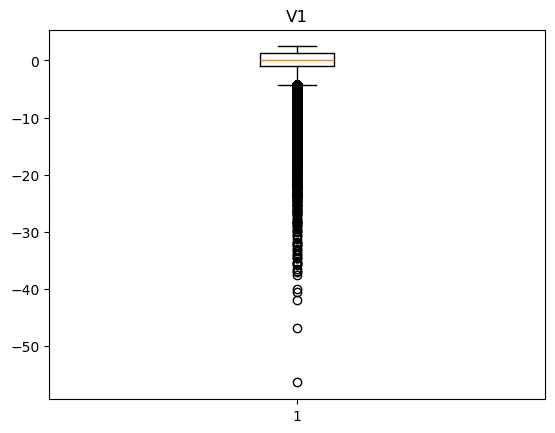

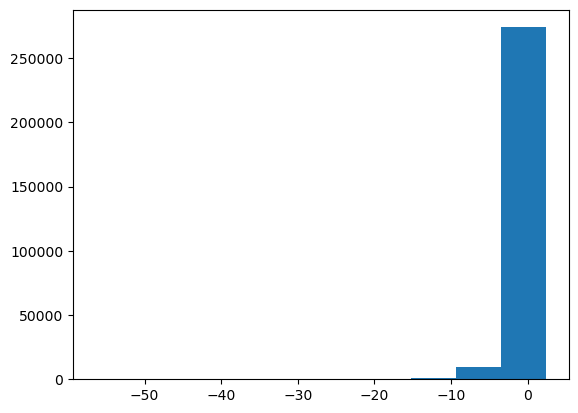

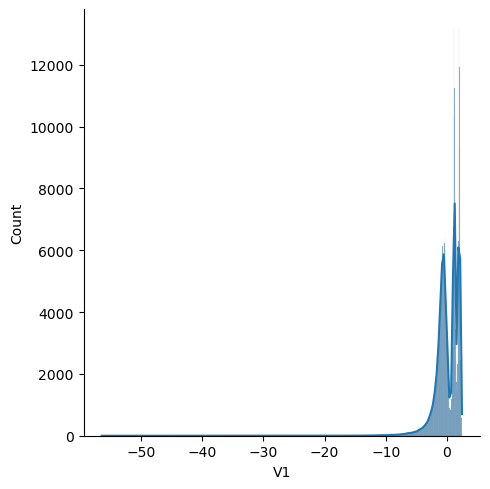

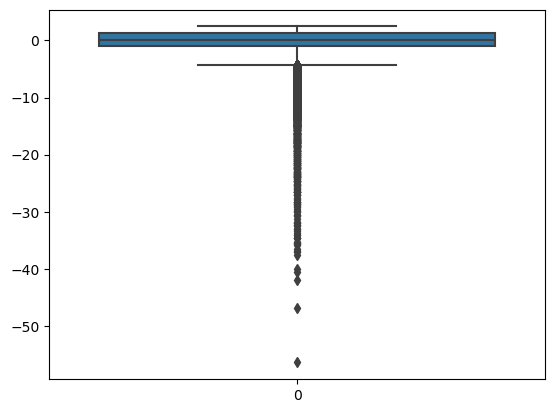

Skewed of V1 is =  -3.0
 There is skewed distribution 
 Apply IRQ or Percentile any one of them
V1 of q1 ==  -0.920373384390322
V1 of q3 ==  1.315641693877865
V1  of IQR(Inter Quantile Range) ==  2.236015078268187
V1 of lower limit ==  4.669664311280146
V1 of upper limit ==  -4.274396001792603
****************************************************************


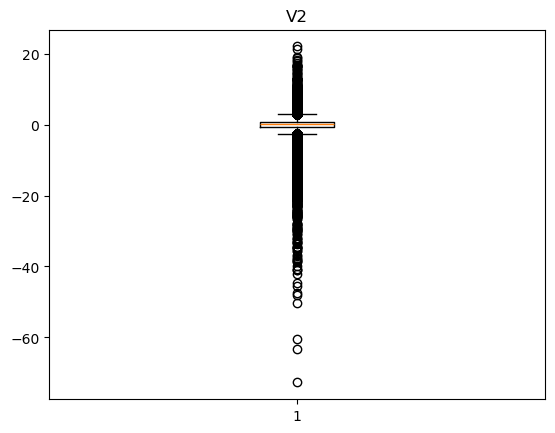

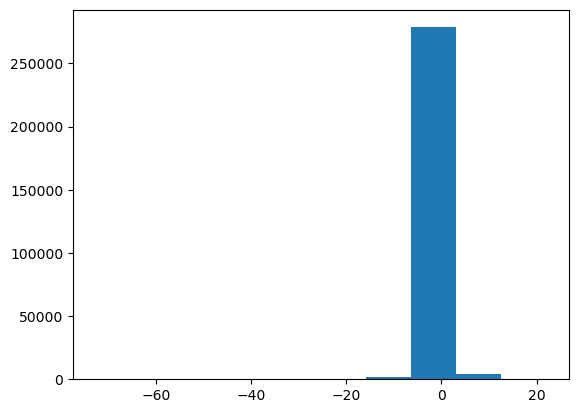

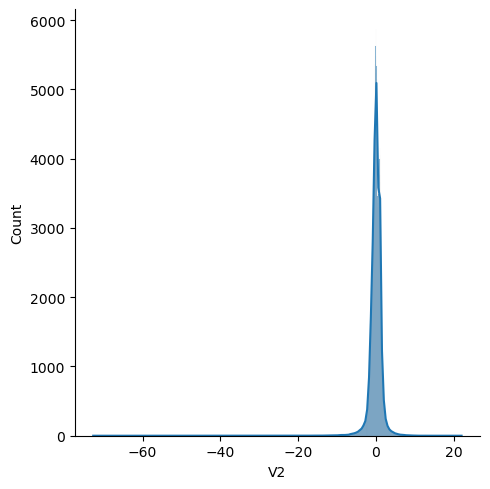

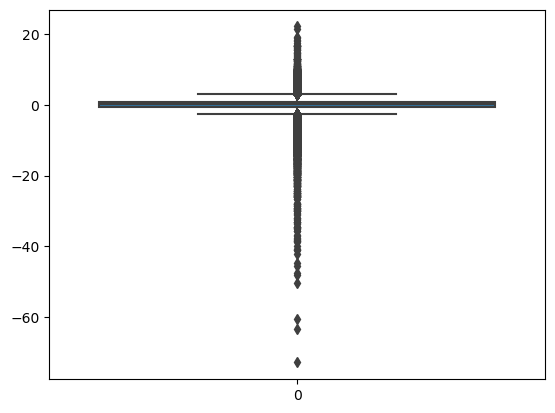

Skewed of V2 is =  -5.0
 There is skewed distribution 
 Apply IRQ or Percentile any one of them
V2 of q1 ==  -0.598549913464916
V2 of q3 ==  0.8037238712400945
V2  of IQR(Inter Quantile Range) ==  1.4022737847050104
V2 of lower limit ==  2.90713454829761
V2 of upper limit ==  -2.7019605905224315
****************************************************************


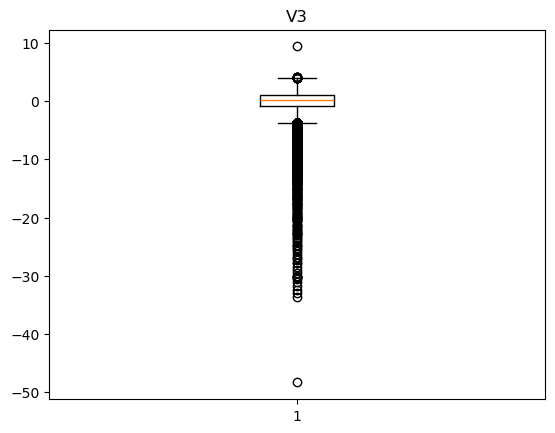

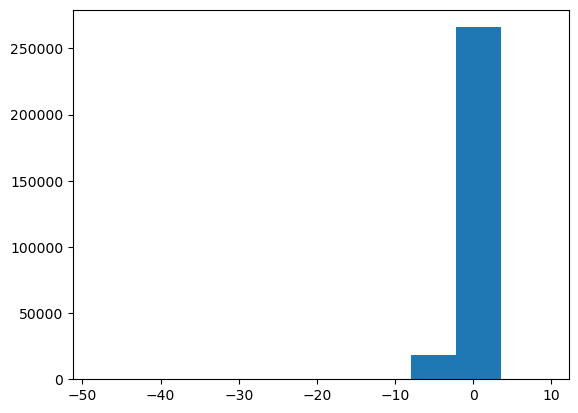

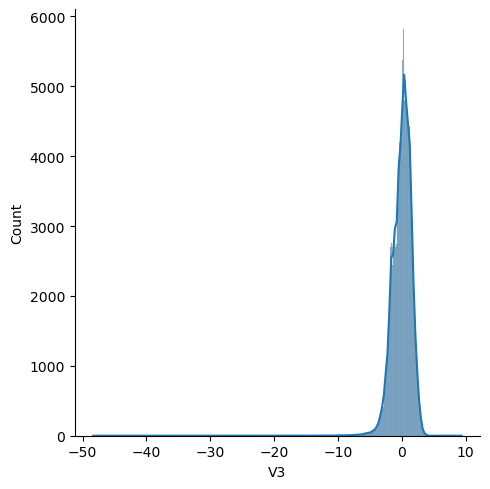

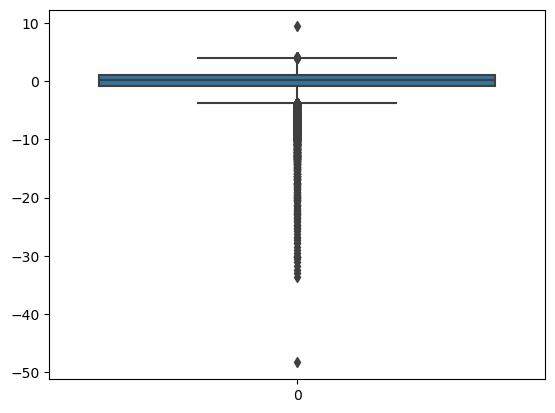

Skewed of V3 is =  -2.0
 There is skewed distribution 
 Apply IRQ or Percentile any one of them
V3 of q1 ==  -0.8903648381551406
V3 of q3 ==  1.027195542465555
V3  of IQR(Inter Quantile Range) ==  1.9175603806206956
V3 of lower limit ==  3.9035361133965982
V3 of upper limit ==  -3.7667054090861836
****************************************************************


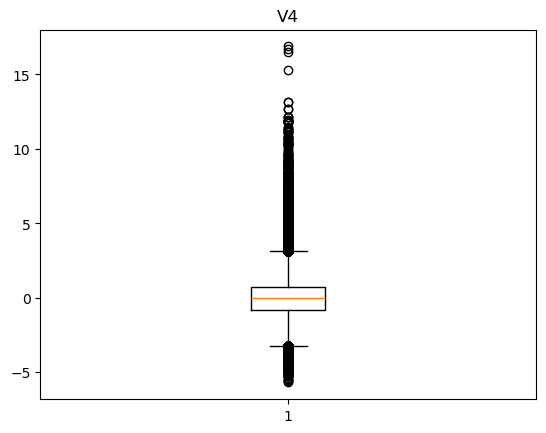

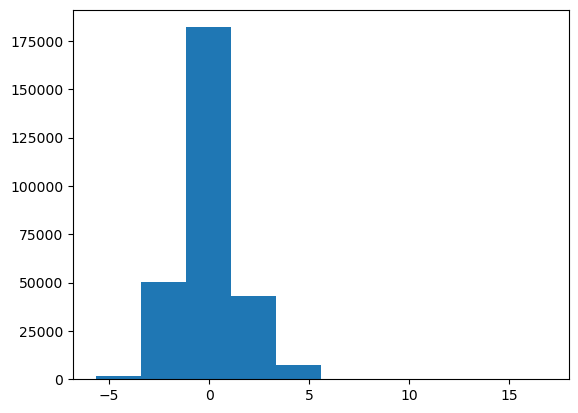

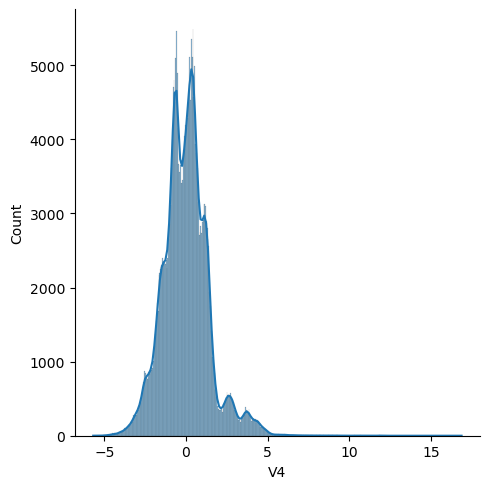

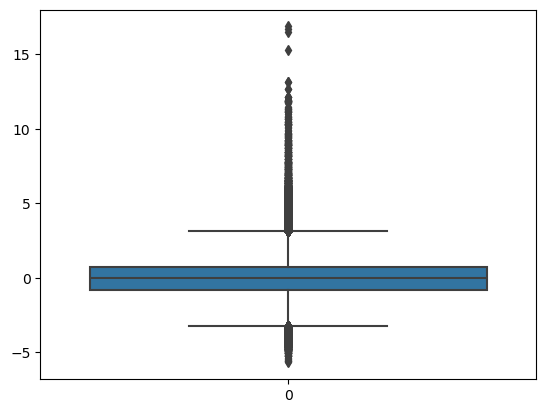

Skewed of V4 is =  1.0
 There is skewed distribution 
 Apply IRQ or Percentile any one of them
V4 of q1 ==  -0.848640116331273
V4 of q3 ==  0.7433412894685876
V4  of IQR(Inter Quantile Range) ==  1.5919814057998605
V4 of lower limit ==  3.1313133981683787
V4 of upper limit ==  -3.236612225031064
****************************************************************


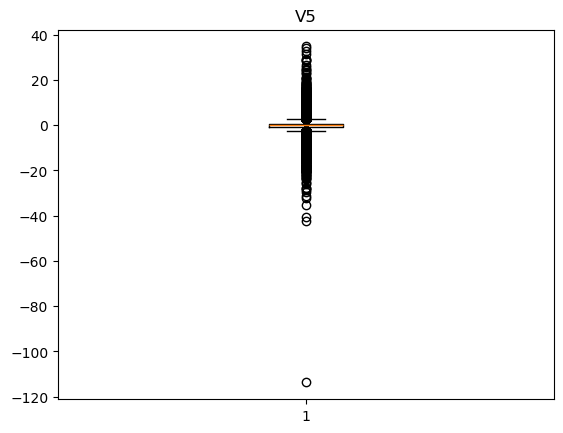

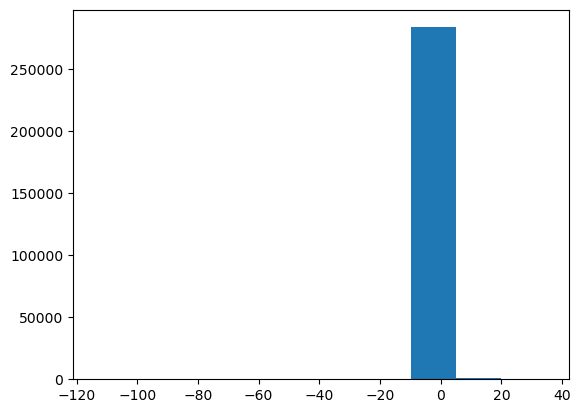

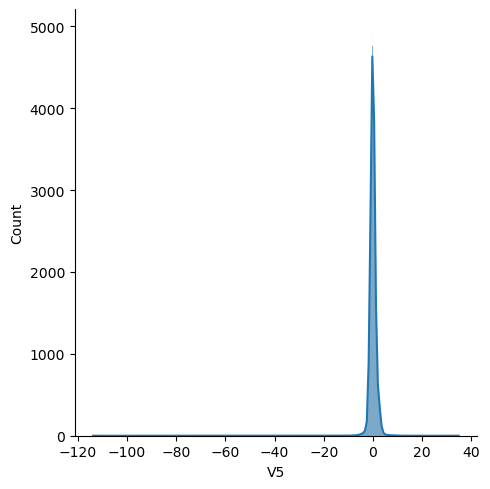

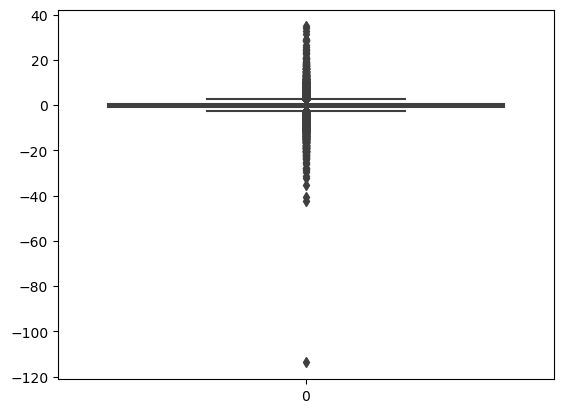

Skewed of V5 is =  -2.0
 There is skewed distribution 
 Apply IRQ or Percentile any one of them
V5 of q1 ==  -0.6915970708876575
V5 of q3 ==  0.611926439735193
V5  of IQR(Inter Quantile Range) ==  1.3035235106228504
V5 of lower limit ==  2.5672117056694685
V5 of upper limit ==  -2.646882336821933
****************************************************************


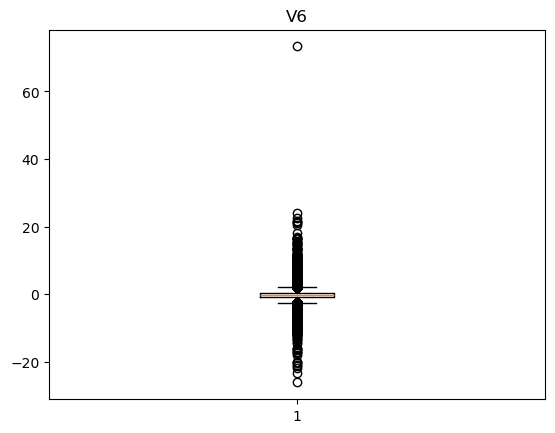

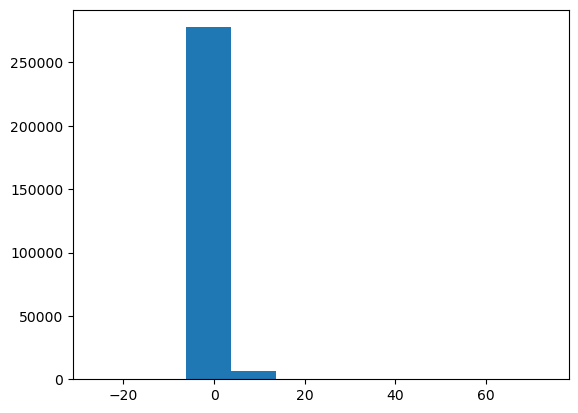

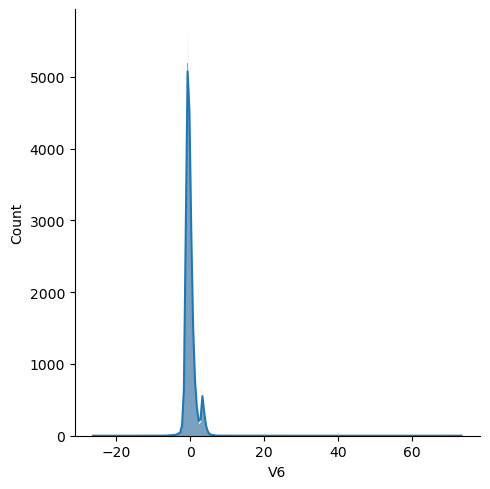

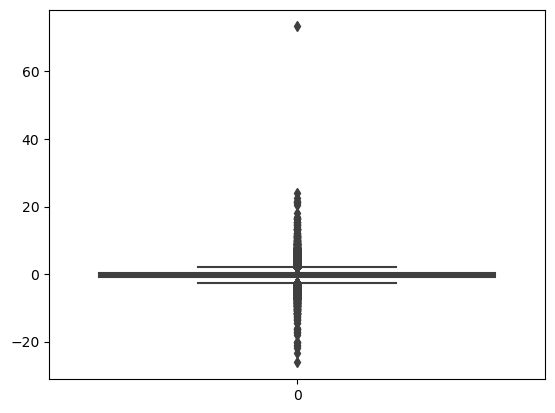

Skewed of V6 is =  2.0
 There is skewed distribution 
 Apply IRQ or Percentile any one of them
V6 of q1 ==  -0.768295608460489
V6 of q3 ==  0.39856489635610504
V6  of IQR(Inter Quantile Range) ==  1.166860504816594
V6 of lower limit ==  2.148855653580996
V6 of upper limit ==  -2.51858636568538
****************************************************************


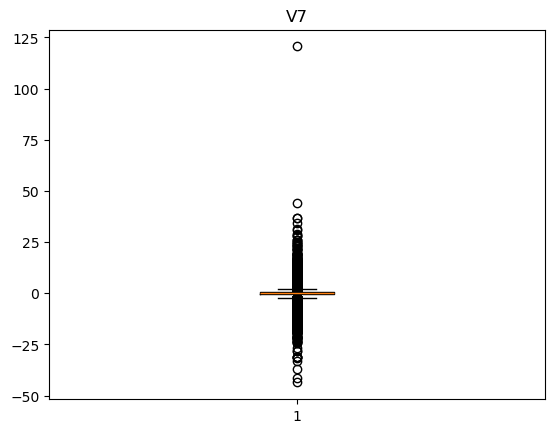

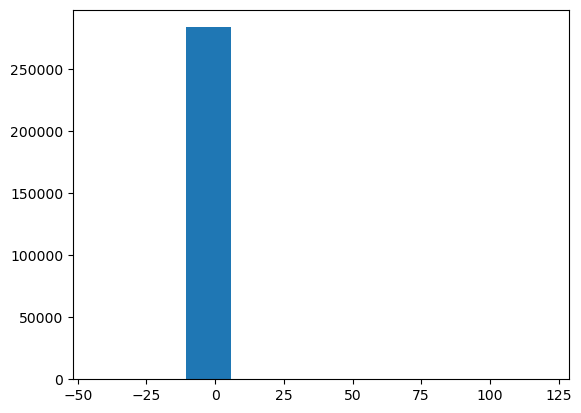

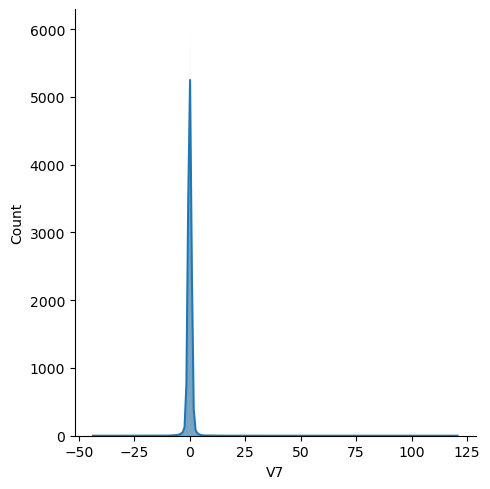

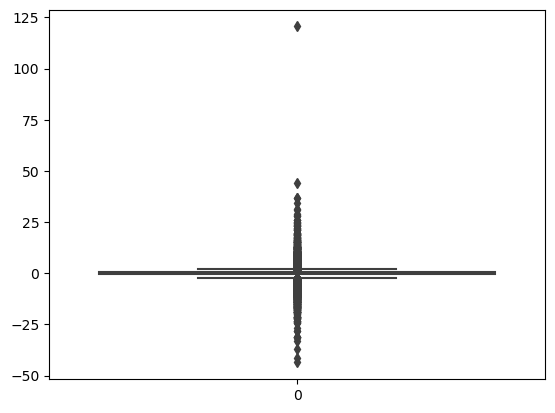

Skewed of V7 is =  3.0
 There is skewed distribution 
 Apply IRQ or Percentile any one of them
V7 of q1 ==  -0.5540758790365226
V7 of q3 ==  0.5704360728775986
V7  of IQR(Inter Quantile Range) ==  1.1245119519141211
V7 of lower limit ==  2.2572040007487804
V7 of upper limit ==  -2.240843806907704
****************************************************************


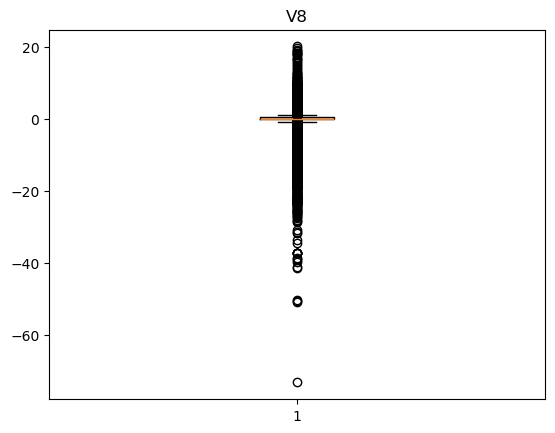

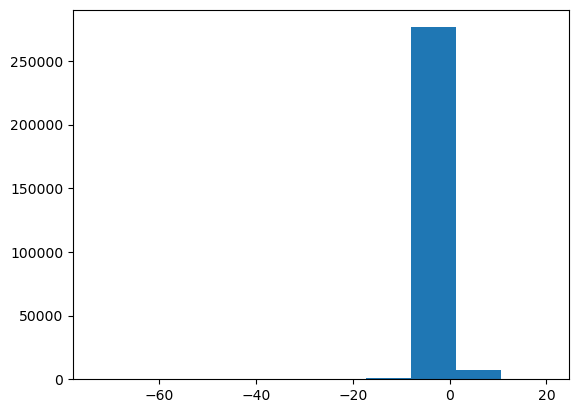

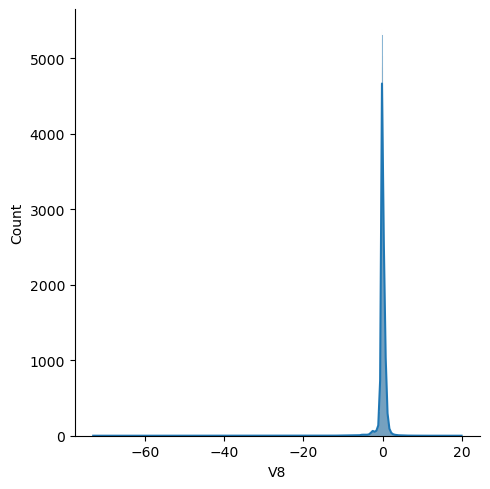

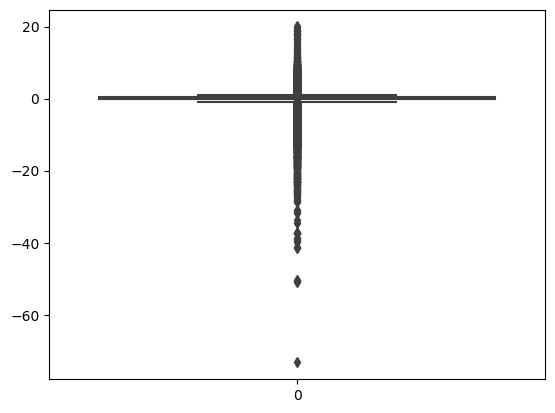

Skewed of V8 is =  -9.0
 There is skewed distribution 
 Apply IRQ or Percentile any one of them
V8 of q1 ==  -0.2086297440394665
V8 of q3 ==  0.327345861923449
V8  of IQR(Inter Quantile Range) ==  0.5359756059629155
V8 of lower limit ==  1.1313092708678223
V8 of upper limit ==  -1.0125931529838397
****************************************************************


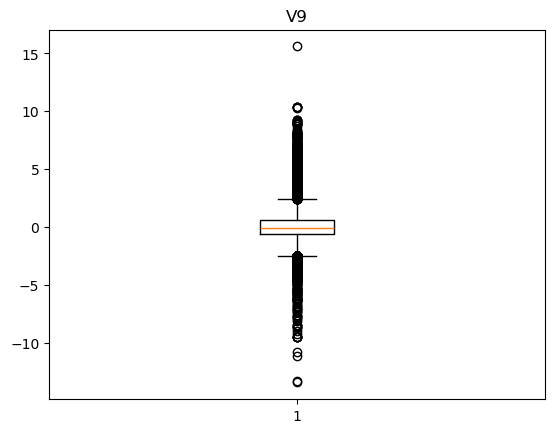

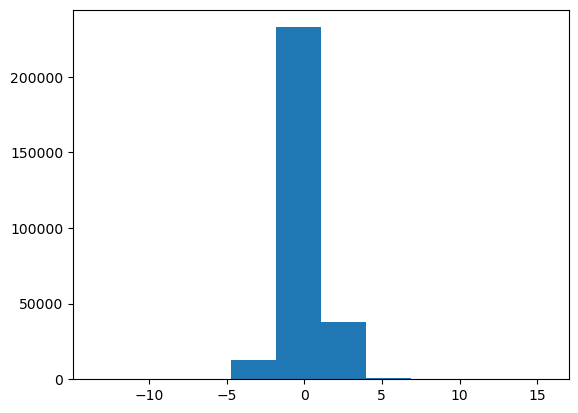

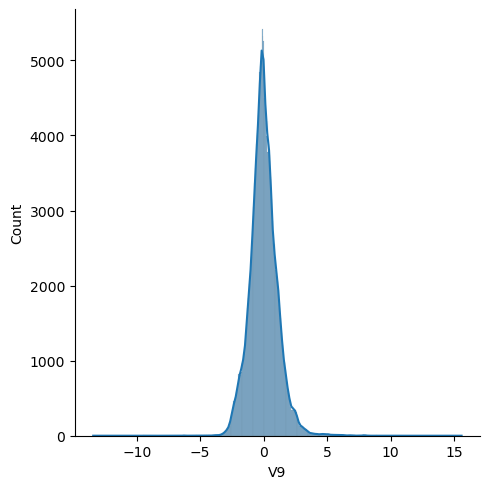

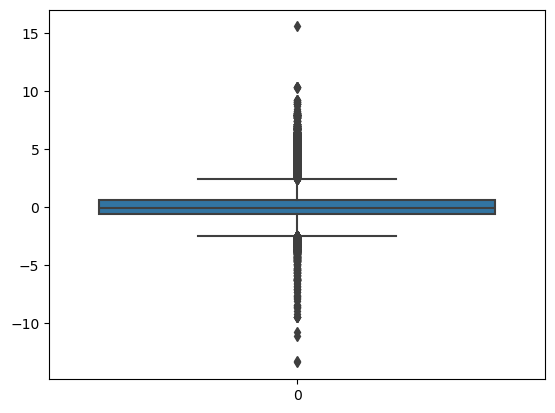

Skewed of V9 is =  1.0
 There is skewed distribution 
 Apply IRQ or Percentile any one of them
V9 of q1 ==  -0.6430975702665915
V9 of q3 ==  0.5971390302822686
V9  of IQR(Inter Quantile Range) ==  1.24023660054886
V9 of lower limit ==  2.457493931105559
V9 of upper limit ==  -2.503452471089882
****************************************************************


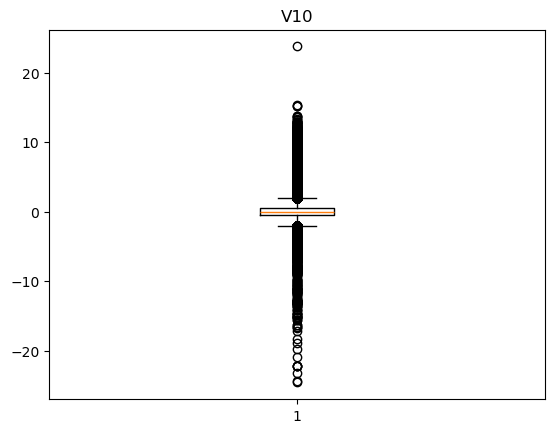

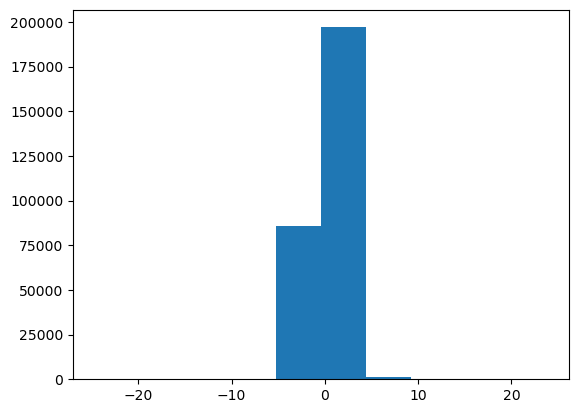

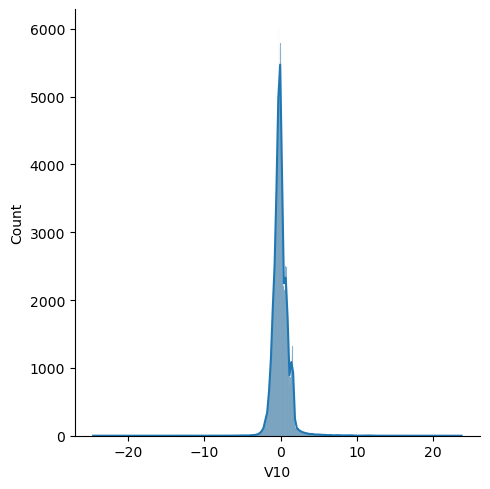

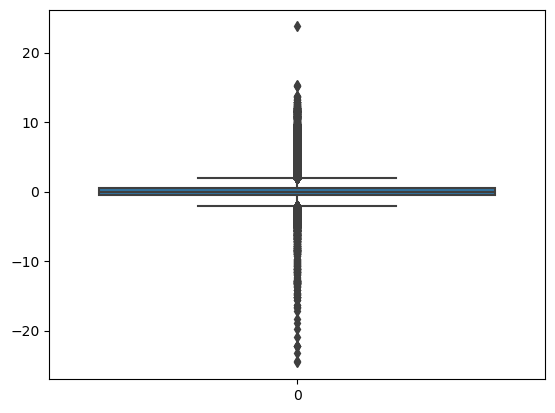

Skewed of V10 is =  1.0
 There is skewed distribution 
 Apply IRQ or Percentile any one of them
V10 of q1 ==  -0.5354257264933235
V10 of q3 ==  0.453923445139507
V10  of IQR(Inter Quantile Range) ==  0.9893491716328305
V10 of lower limit ==  1.9379472025887527
V10 of upper limit ==  -2.0194494839425694
****************************************************************


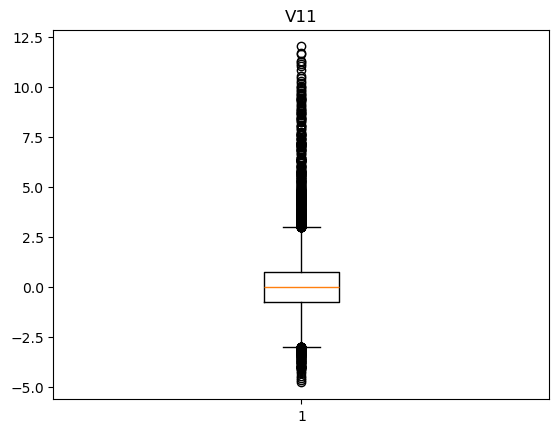

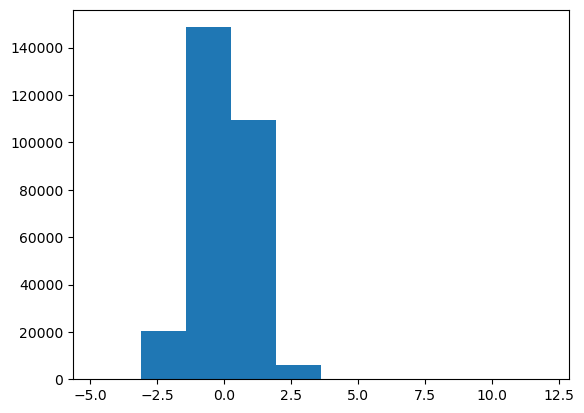

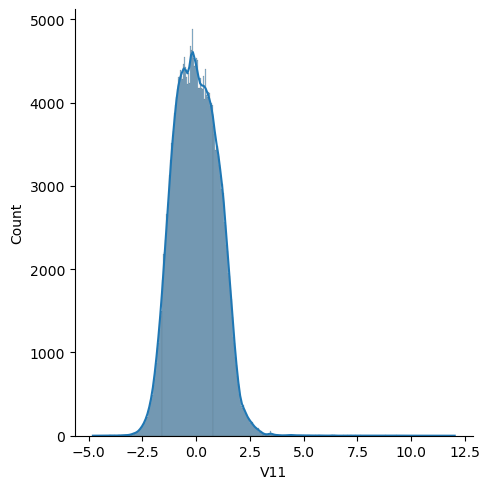

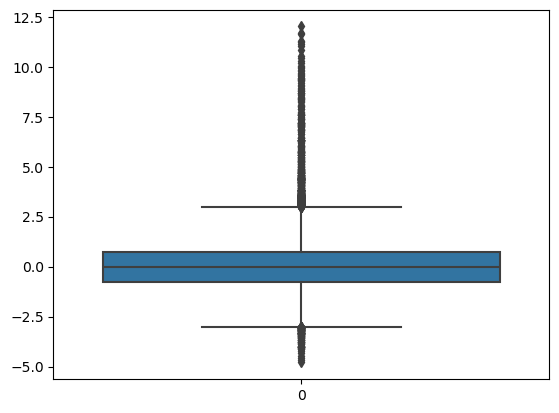

Skewed of V11 is =  0.0
 There is the Normal skewed distribution
 Apply Mean standard deviation or Standard deviation(ll=-3 and ul=3)
V11 of mean ==  1.673326932726423e-15
V11 of std  ==  1.0207130277115524
V11 of lower limit ==  3.062139083134659
V11 of upper limit ==  -3.0621390831346553
****************************************************************


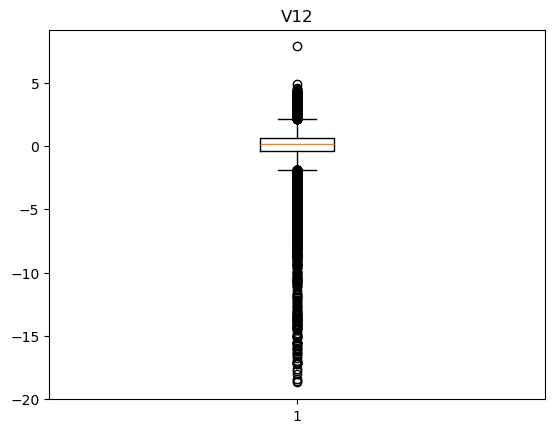

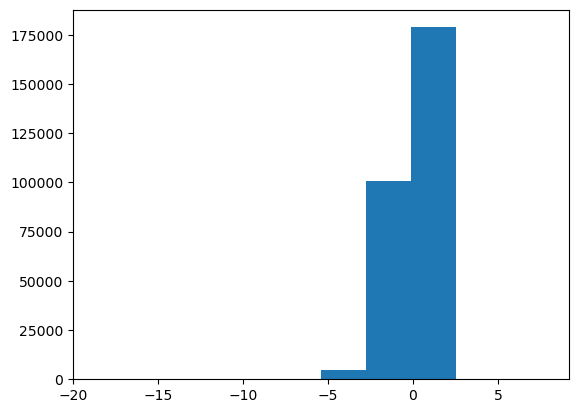

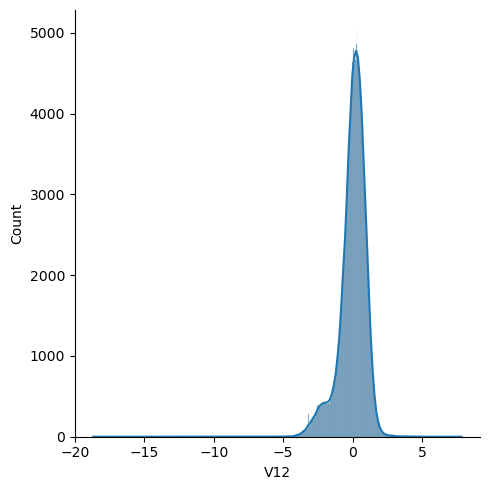

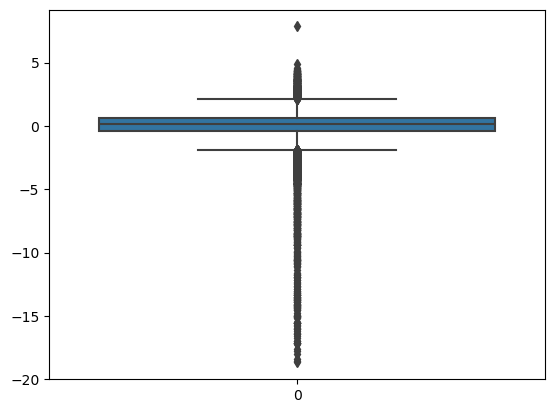

Skewed of V12 is =  -2.0
 There is skewed distribution 
 Apply IRQ or Percentile any one of them
V12 of q1 ==  -0.40557148544041355
V12 of q3 ==  0.618238032946136
V12  of IQR(Inter Quantile Range) ==  1.0238095183865497
V12 of lower limit ==  2.1539523105259604
V12 of upper limit ==  -1.941285763020238
****************************************************************


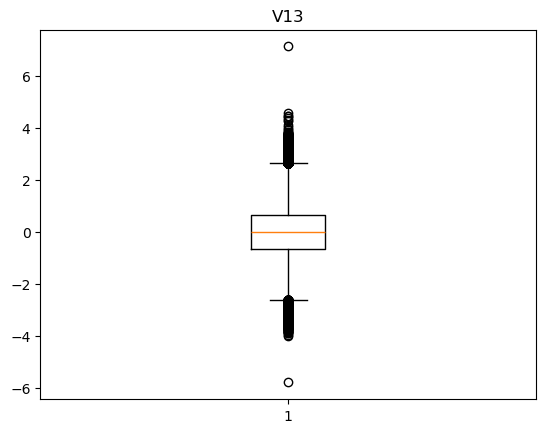

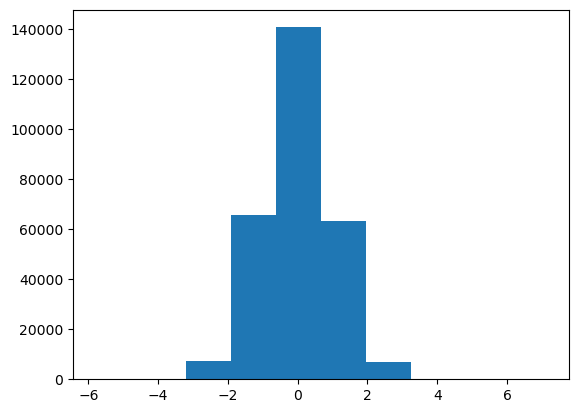

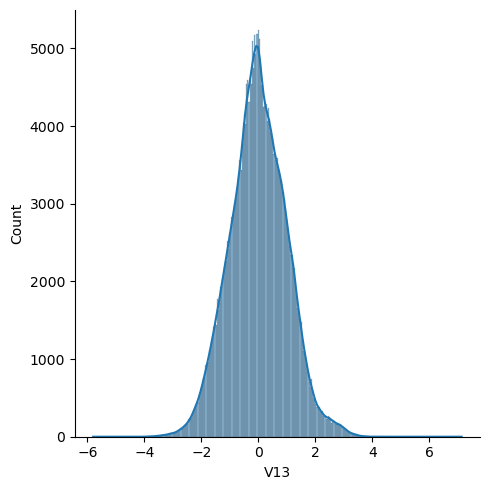

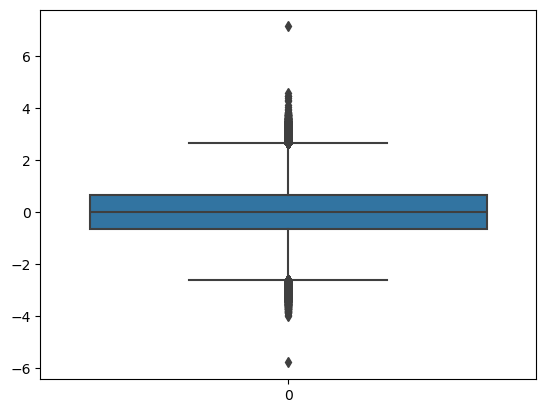

Skewed of V13 is =  0.0
 There is the Normal skewed distribution
 Apply Mean standard deviation or Standard deviation(ll=-3 and ul=3)
V13 of mean ==  8.190001274383203e-16
V13 of std  ==  0.9952742301251488
V13 of lower limit ==  2.9858226903754472
V13 of upper limit ==  -2.9858226903754455
****************************************************************


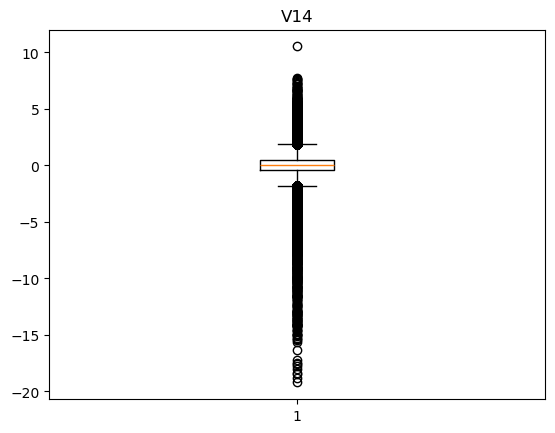

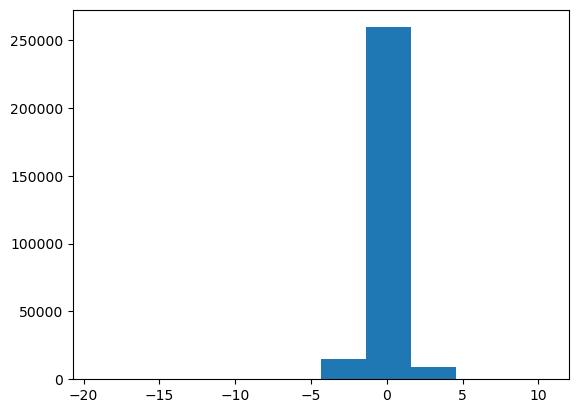

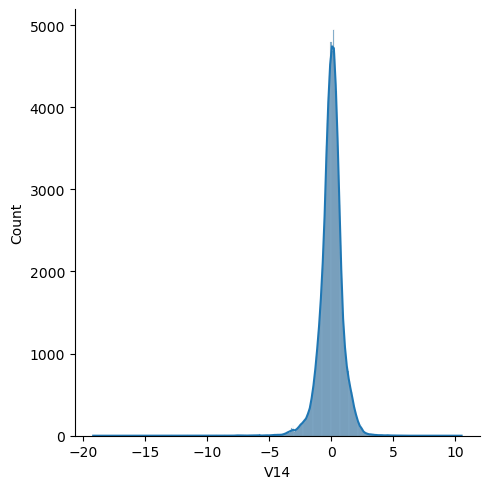

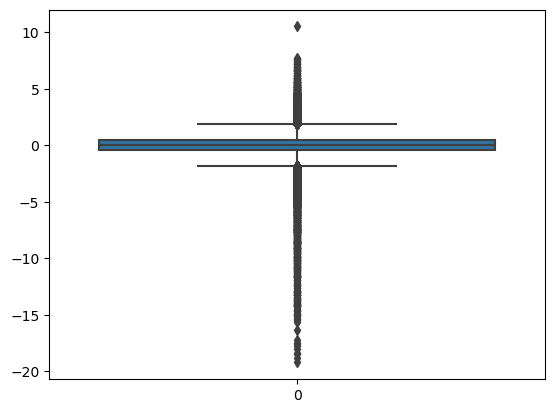

Skewed of V14 is =  -2.0
 There is skewed distribution 
 Apply IRQ or Percentile any one of them
V14 of q1 ==  -0.4255740124549935
V14 of q3 ==  0.493149849218149
V14  of IQR(Inter Quantile Range) ==  0.9187238616731425
V14 of lower limit ==  1.8712356417278626
V14 of upper limit ==  -1.803659804964707
****************************************************************


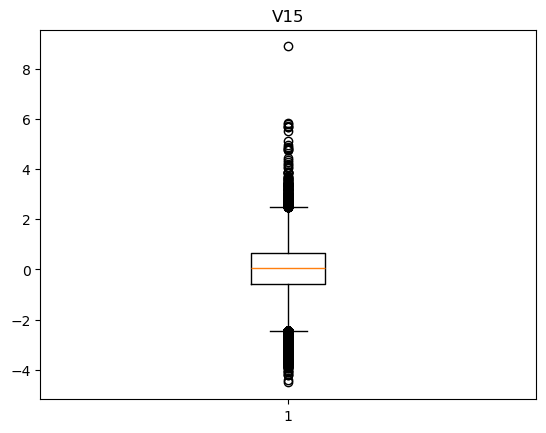

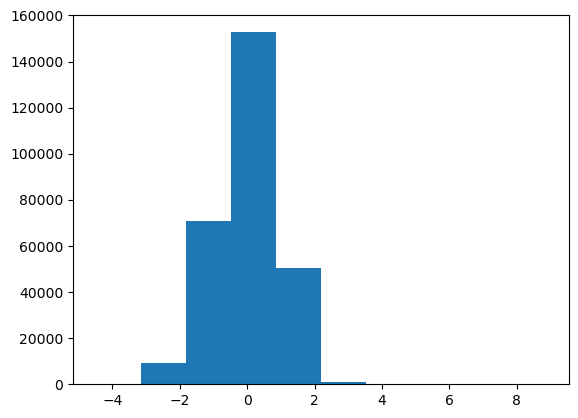

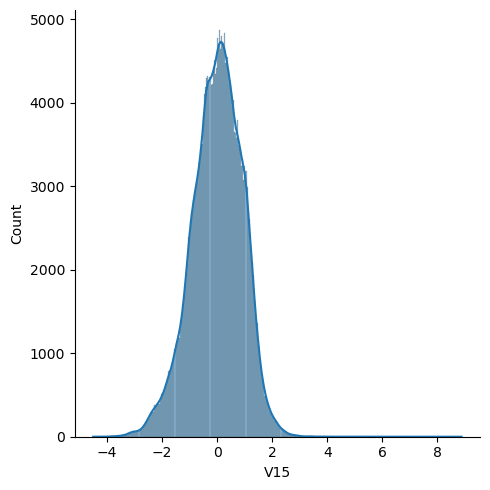

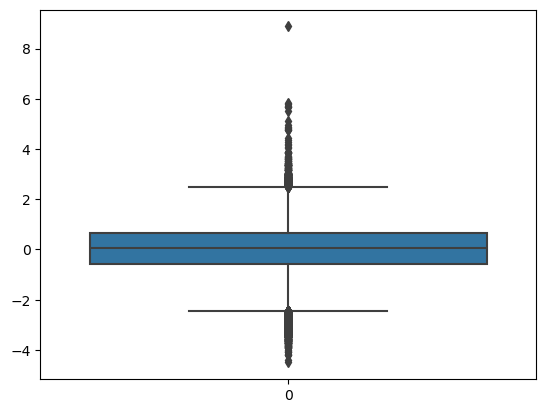

Skewed of V15 is =  -0.0
 There is the Normal skewed distribution
 Apply Mean standard deviation or Standard deviation(ll=-3 and ul=3)
V15 of mean ==  4.887455859804944e-15
V15 of std  ==  0.9153160116104295
V15 of lower limit ==  2.7459480348312932
V15 of upper limit ==  -2.7459480348312835
****************************************************************


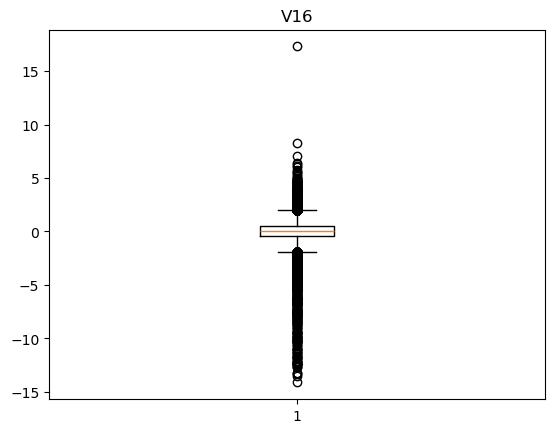

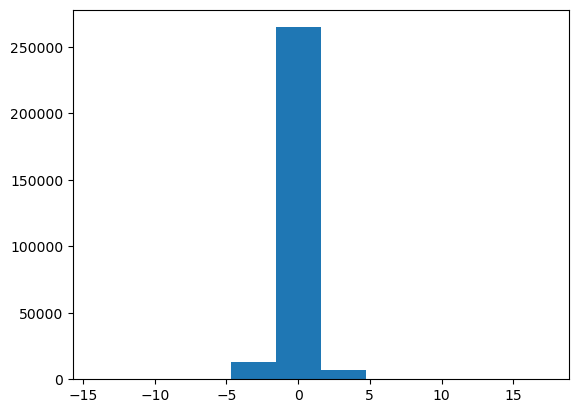

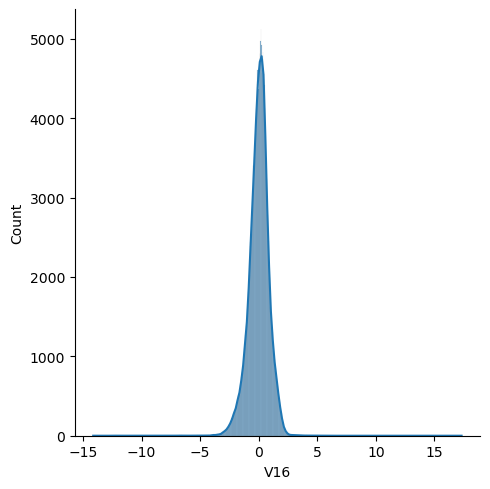

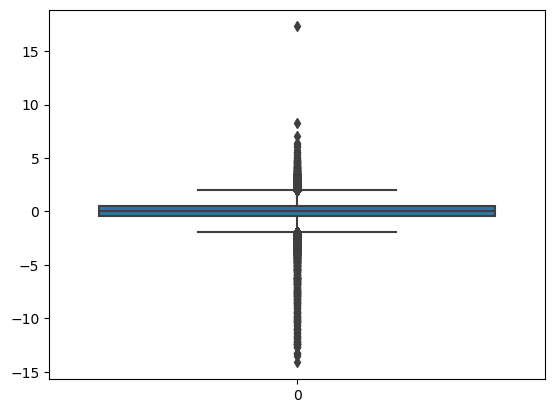

Skewed of V16 is =  -1.0
 There is skewed distribution 
 Apply IRQ or Percentile any one of them
V16 of q1 ==  -0.46803676671289796
V16 of q3 ==  0.523296312475344
V16  of IQR(Inter Quantile Range) ==  0.991333079188242
V16 of lower limit ==  2.010295931257707
V16 of upper limit ==  -1.955036385495261
****************************************************************


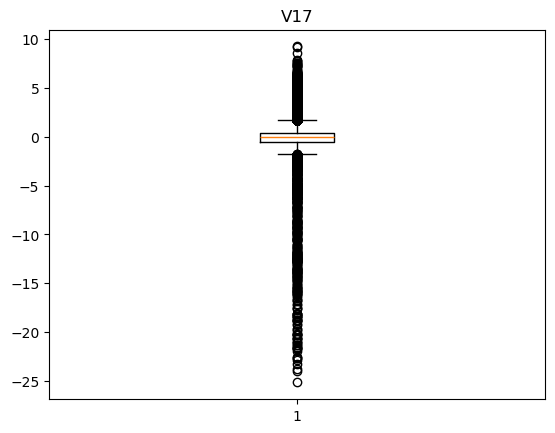

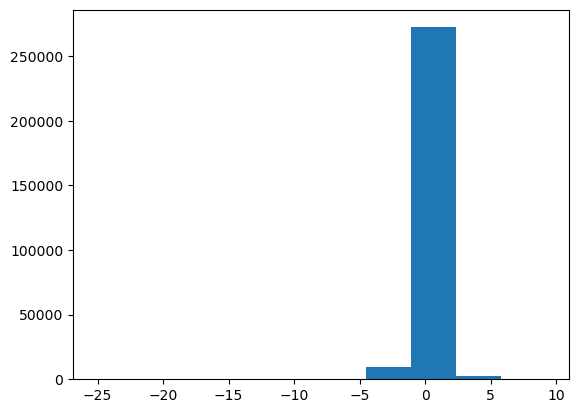

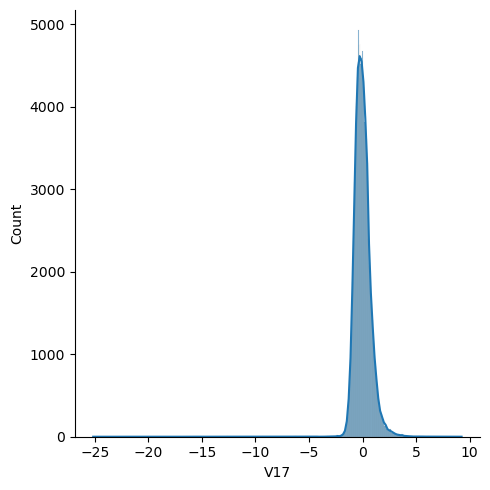

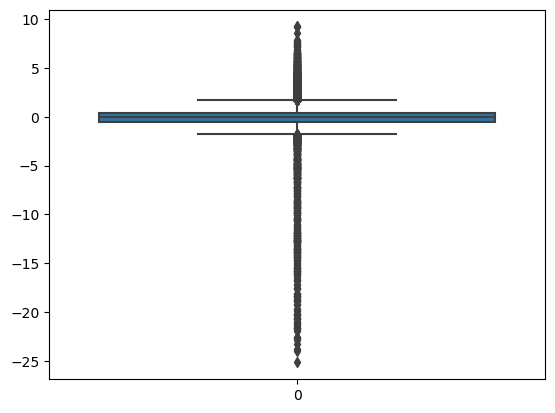

Skewed of V17 is =  -4.0
 There is skewed distribution 
 Apply IRQ or Percentile any one of them
V17 of q1 ==  -0.483748313707048
V17 of q3 ==  0.3996749826503845
V17  of IQR(Inter Quantile Range) ==  0.8834232963574324
V17 of lower limit ==  1.7248099271865331
V17 of upper limit ==  -1.8088832582431966
****************************************************************


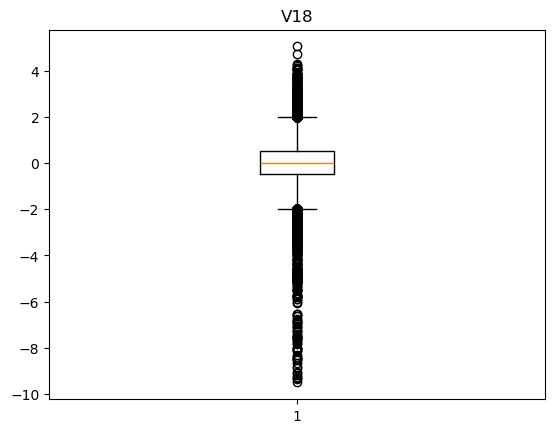

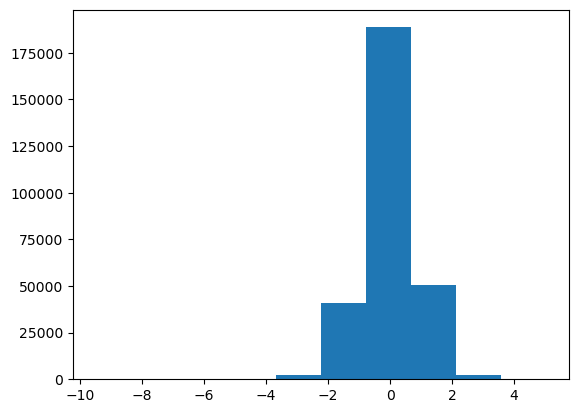

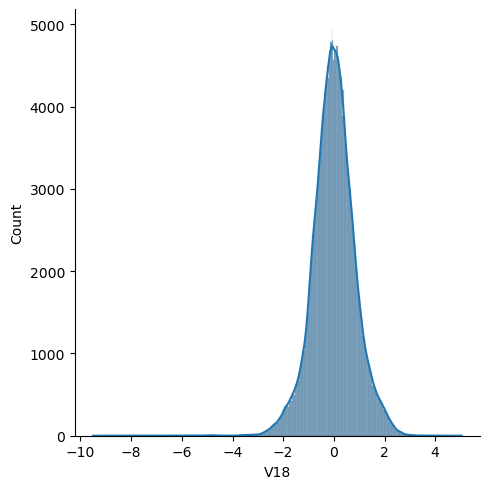

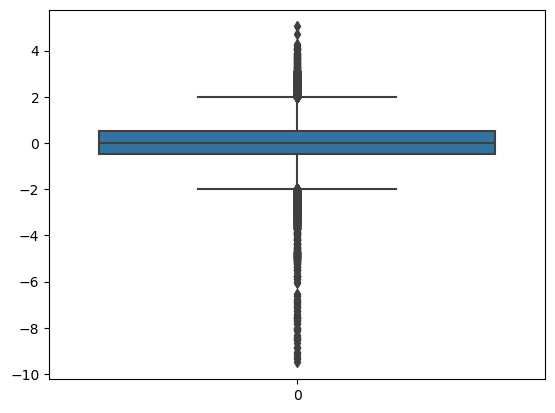

Skewed of V18 is =  -0.0
 There is the Normal skewed distribution
 Apply Mean standard deviation or Standard deviation(ll=-3 and ul=3)
V18 of mean ==  9.564149167014576e-16
V18 of std  ==  0.8381762095288368
V18 of lower limit ==  2.514528628586511
V18 of upper limit ==  -2.5145286285865094
****************************************************************


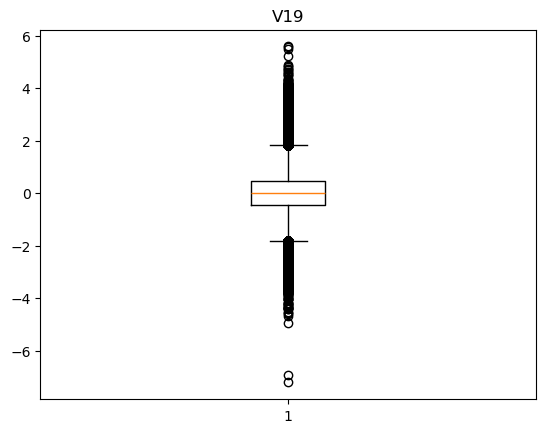

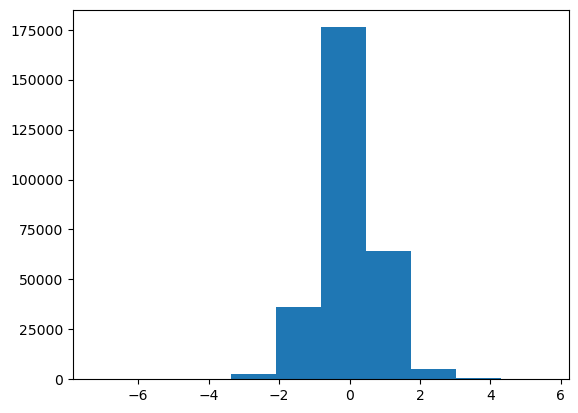

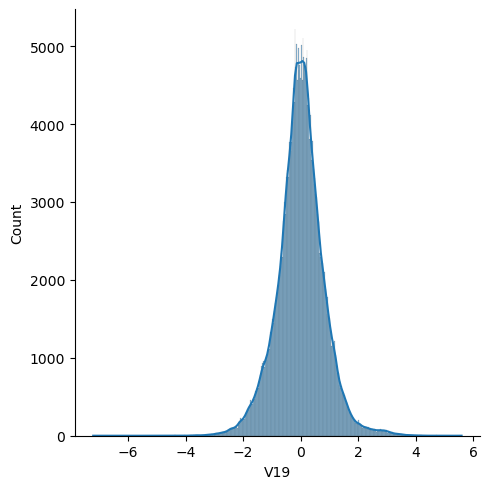

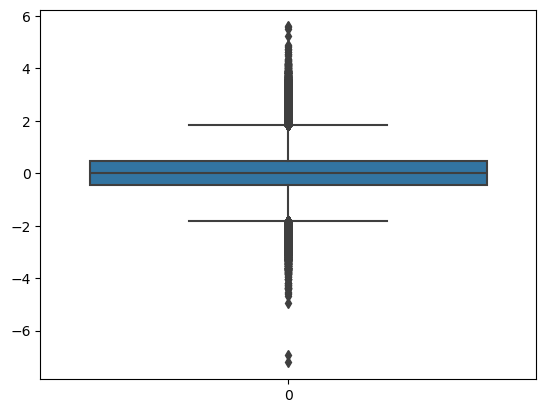

Skewed of V19 is =  0.0
 There is the Normal skewed distribution
 Apply Mean standard deviation or Standard deviation(ll=-3 and ul=3)
V19 of mean ==  1.0399166050935636e-15
V19 of std  ==  0.8140405007685731
V19 of lower limit ==  2.4421215023057203
V19 of upper limit ==  -2.4421215023057186
****************************************************************


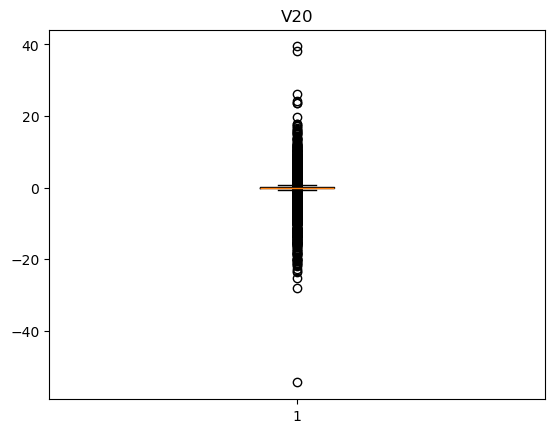

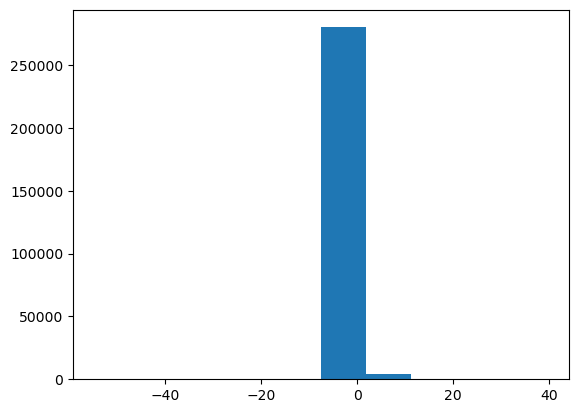

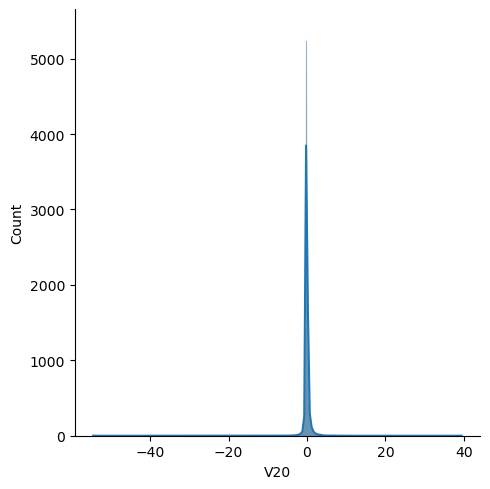

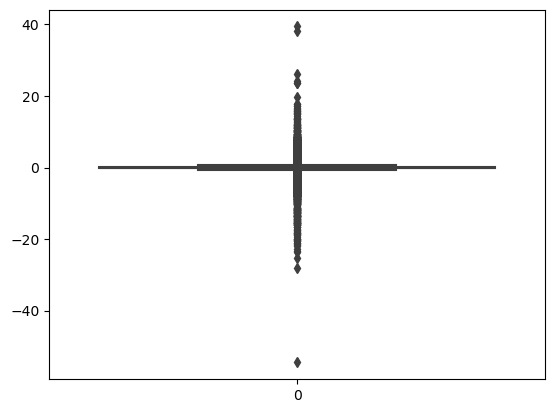

Skewed of V20 is =  -2.0
 There is skewed distribution 
 Apply IRQ or Percentile any one of them
V20 of q1 ==  -0.21172136467424701
V20 of q3 ==  0.1330408409942945
V20  of IQR(Inter Quantile Range) ==  0.34476220566854154
V20 of lower limit ==  0.6501841494971068
V20 of upper limit ==  -0.7288646731770594
****************************************************************


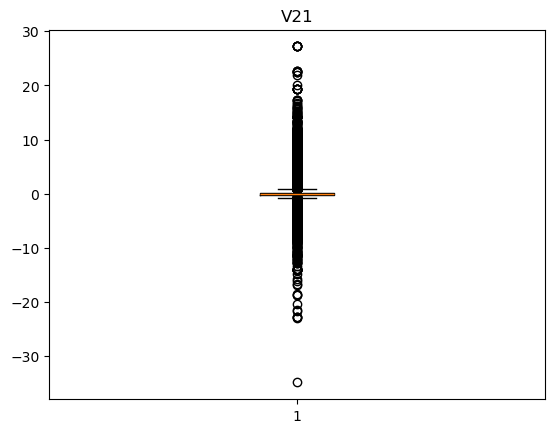

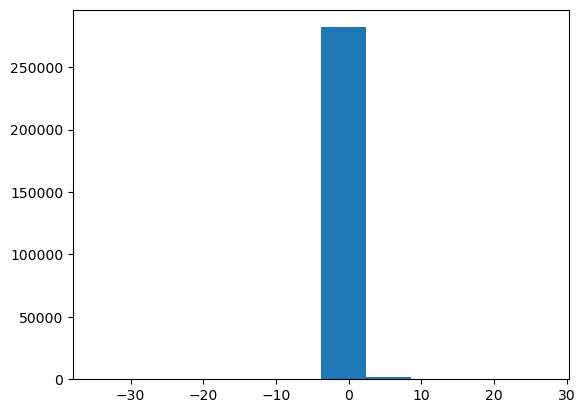

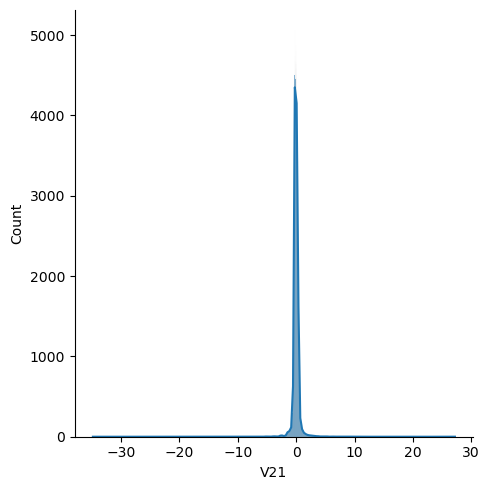

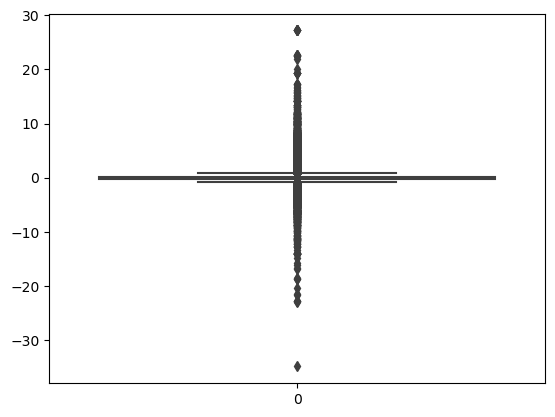

Skewed of V21 is =  4.0
 There is skewed distribution 
 Apply IRQ or Percentile any one of them
V21 of q1 ==  -0.22839494677851702
V21 of q3 ==  0.1863772033785755
V21  of IQR(Inter Quantile Range) ==  0.4147721501570925
V21 of lower limit ==  0.8085354286142143
V21 of upper limit ==  -0.8505531720141558
****************************************************************


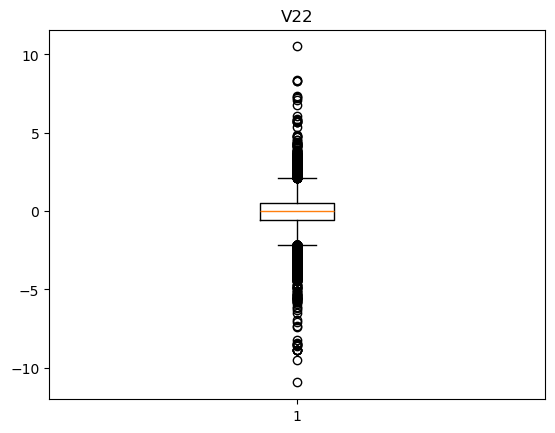

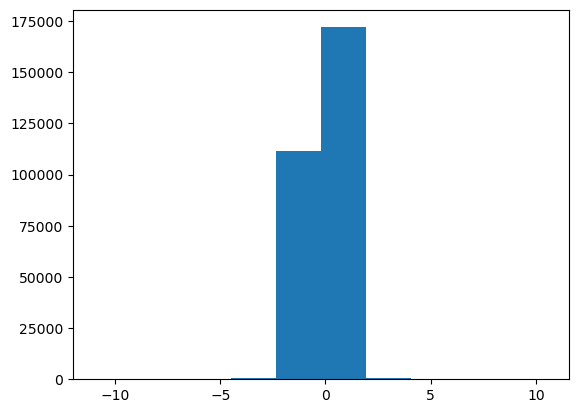

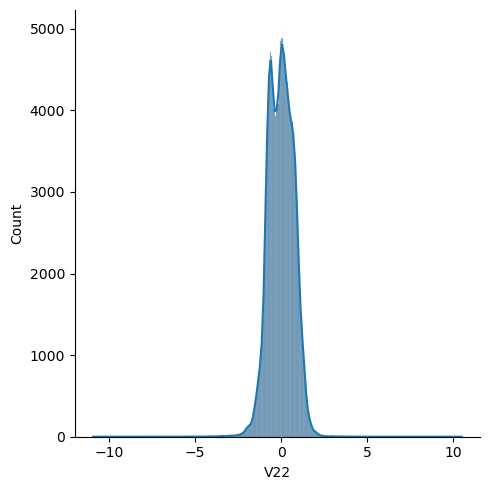

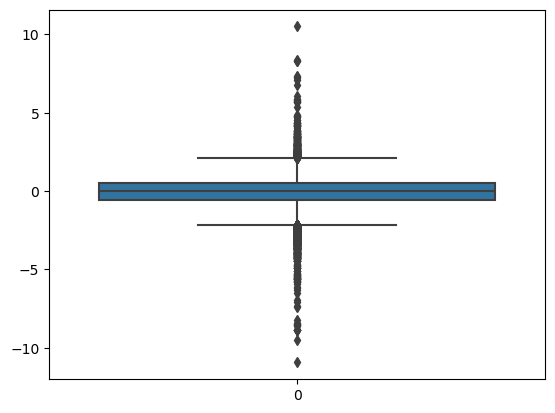

Skewed of V22 is =  -0.0
 There is the Normal skewed distribution
 Apply Mean standard deviation or Standard deviation(ll=-3 and ul=3)
V22 of mean ==  -3.568593220079729e-16
V22 of std  ==  0.7257015604409169
V22 of lower limit ==  2.1771046813227506
V22 of upper limit ==  -2.1771046813227515
****************************************************************


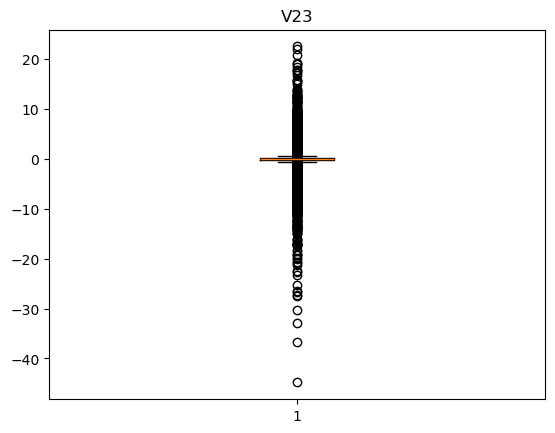

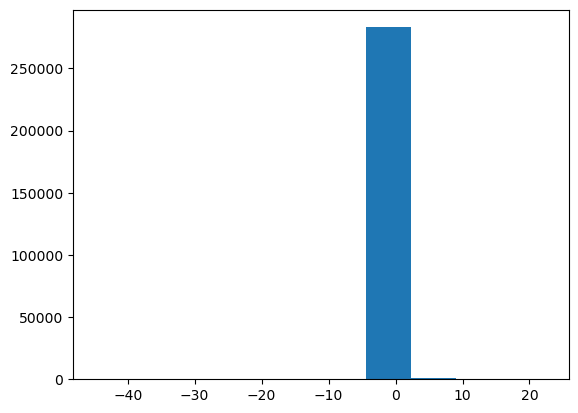

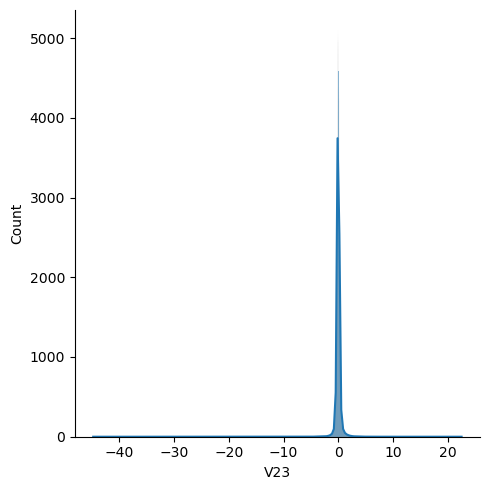

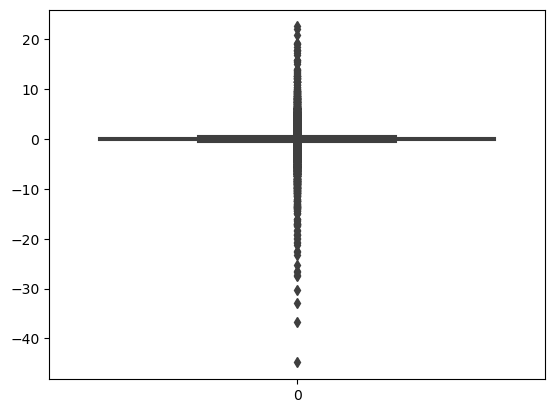

Skewed of V23 is =  -6.0
 There is skewed distribution 
 Apply IRQ or Percentile any one of them
V23 of q1 ==  -0.16184634501488449
V23 of q3 ==  0.14764206385605
V23  of IQR(Inter Quantile Range) ==  0.3094884088709345
V23 of lower limit ==  0.6118746771624517
V23 of upper limit ==  -0.6260789583212862
****************************************************************


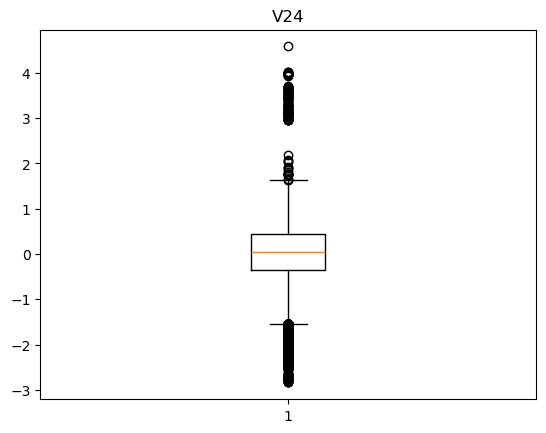

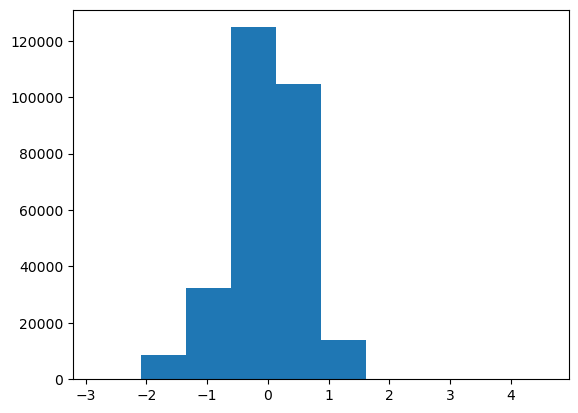

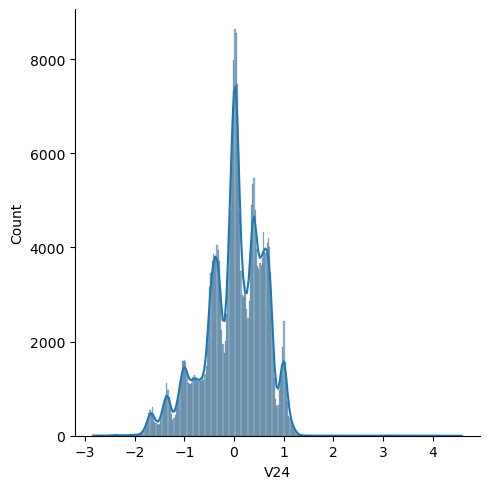

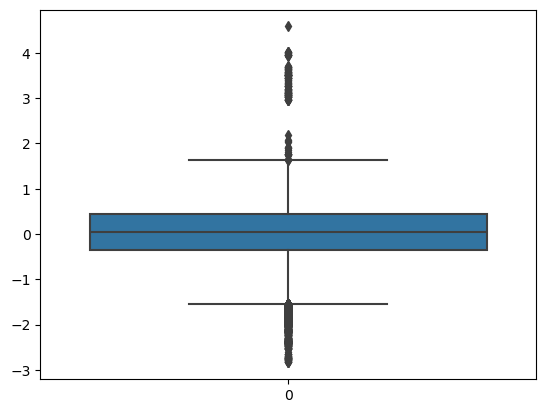

Skewed of V24 is =  -1.0
 There is skewed distribution 
 Apply IRQ or Percentile any one of them
V24 of q1 ==  -0.3545861364094985
V24 of q3 ==  0.439526600168186
V24  of IQR(Inter Quantile Range) ==  0.7941127365776846
V24 of lower limit ==  1.630695705034713
V24 of upper limit ==  -1.5457552412760254
****************************************************************


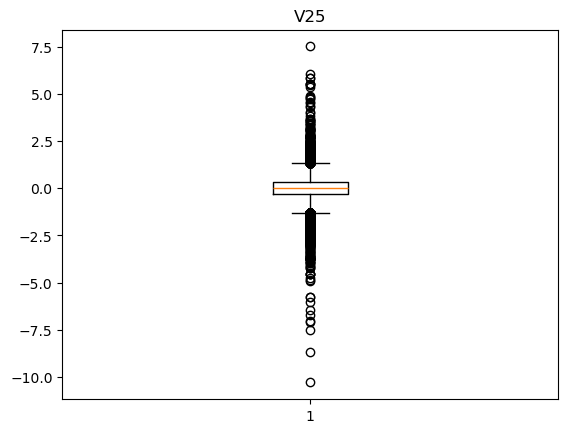

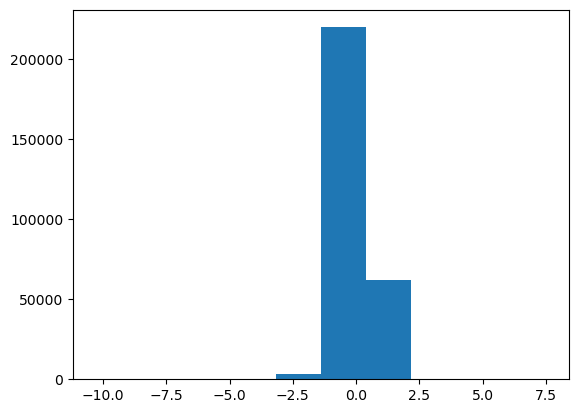

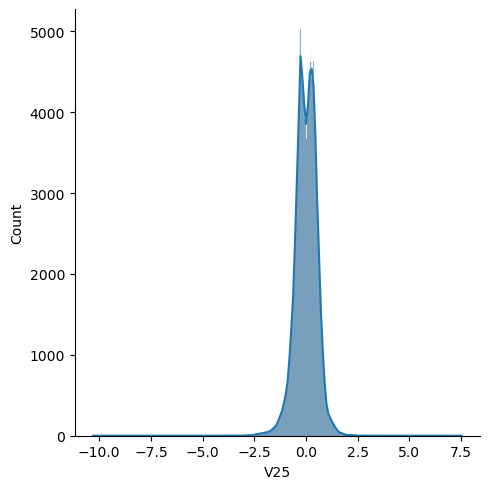

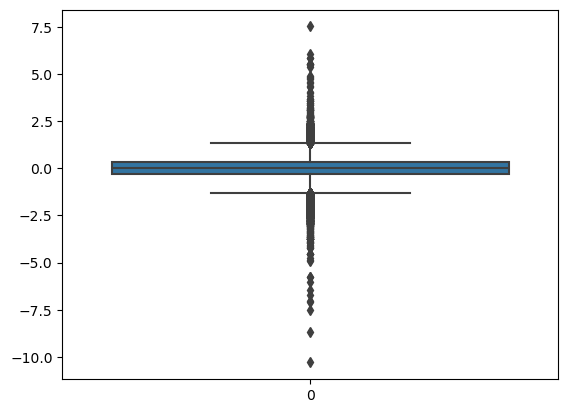

Skewed of V25 is =  -0.0
 There is the Normal skewed distribution
 Apply Mean standard deviation or Standard deviation(ll=-3 and ul=3)
V25 of mean ==  5.340914685085768e-16
V25 of std  ==  0.521278070540938
V25 of lower limit ==  1.5638342116228143
V25 of upper limit ==  -1.5638342116228134
****************************************************************


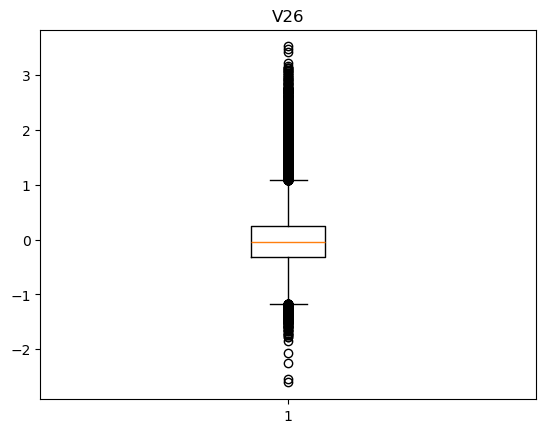

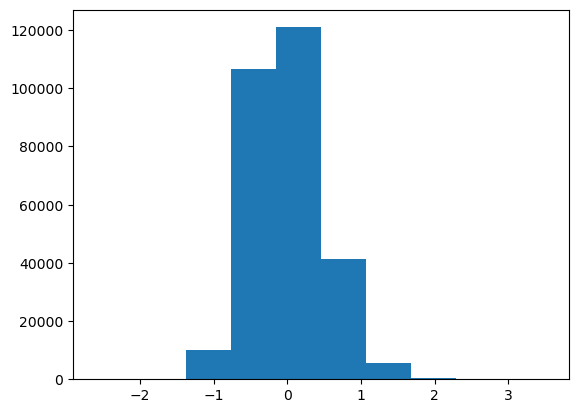

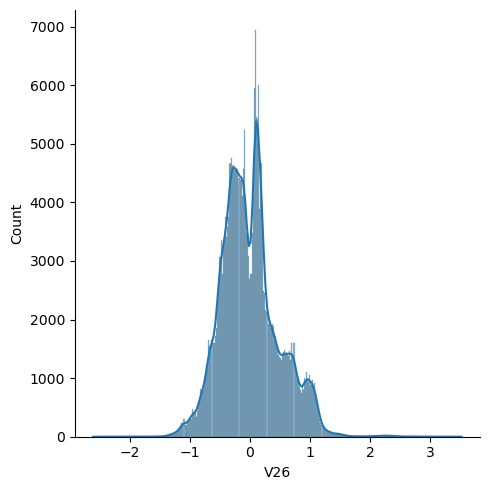

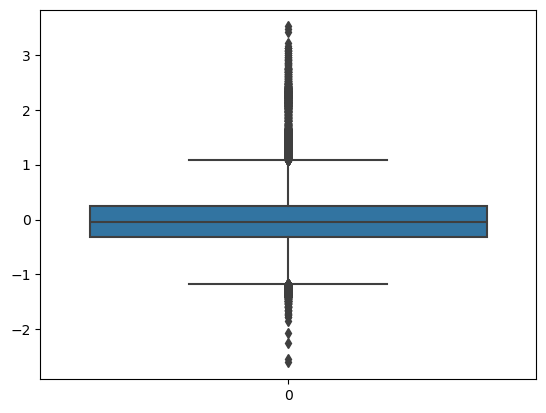

Skewed of V26 is =  1.0
 There is skewed distribution 
 Apply IRQ or Percentile any one of them
V26 of q1 ==  -0.3269839258807195
V26 of q3 ==  0.2409521737147555
V26  of IQR(Inter Quantile Range) ==  0.567936099595475
V26 of lower limit ==  1.092856323107968
V26 of upper limit ==  -1.178888075273932
****************************************************************


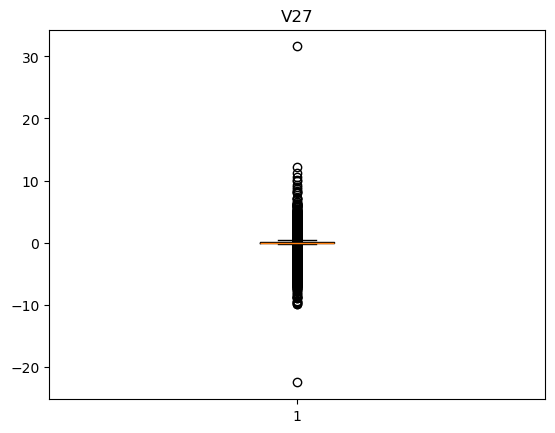

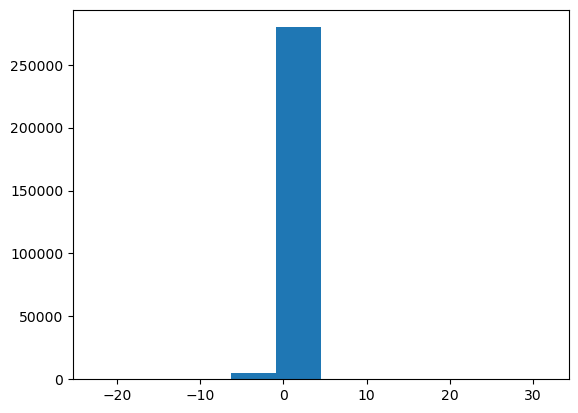

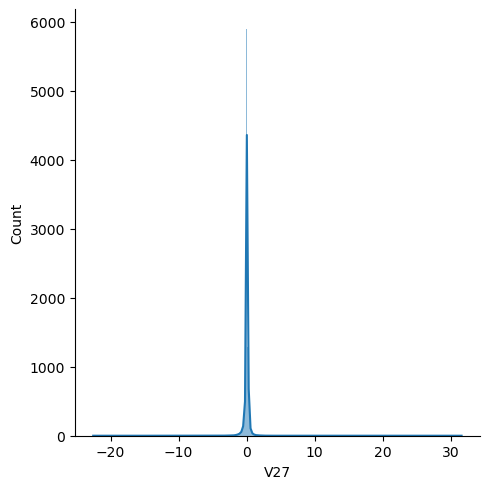

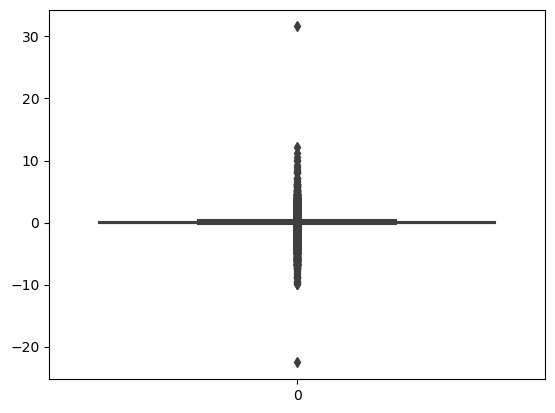

Skewed of V27 is =  -1.0
 There is skewed distribution 
 Apply IRQ or Percentile any one of them
V27 of q1 ==  -0.07083952930446921
V27 of q3 ==  0.09104511968580689
V27  of IQR(Inter Quantile Range) ==  0.1618846489902761
V27 of lower limit ==  0.333872093171221
V27 of upper limit ==  -0.3136665027898834
****************************************************************


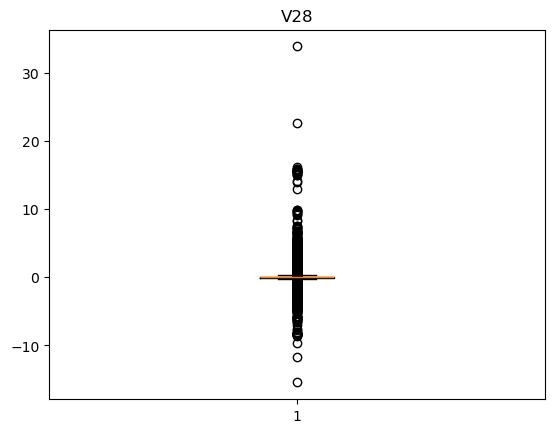

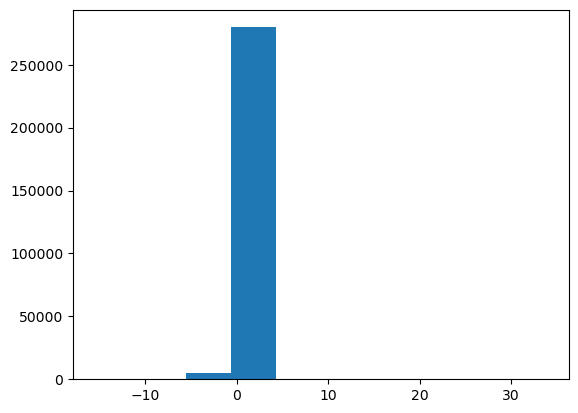

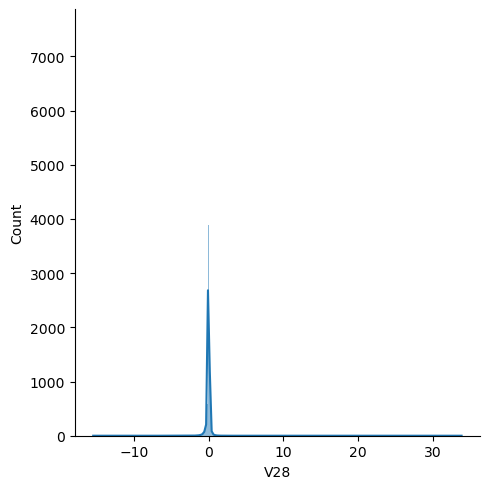

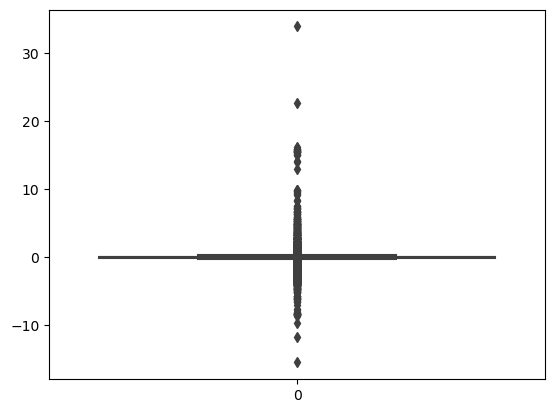

Skewed of V28 is =  11.0
 There is skewed distribution 
 Apply IRQ or Percentile any one of them
V28 of q1 ==  -0.0529597930169809
V28 of q3 ==  0.07827995475782015
V28  of IQR(Inter Quantile Range) ==  0.13123974777480105
V28 of lower limit ==  0.27513957642002174
V28 of upper limit ==  -0.24981941467918245
****************************************************************


In [7]:



# error checking using  the boxplot 
c=['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10','V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20','V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28']

for i in c:
    plt.title(i)
    plt.boxplot(df[i])
    plt.show()
    plt.hist(df[i])
    plt.show
    sns.displot(df[i],kde=True)
    plt.show()
    sns.boxplot(df[i])
    plt.show()
    
# checking of there is skewed distribution of normal distibution
    print(f'Skewed of {i} is = ',df[i].skew().round())
    sk=df[i].skew().round()

# checking the upper and lower limit and clean the data    
    if sk==0 or sk==-0:
        print(" There is the Normal skewed distribution")
        print(" Apply Mean standard deviation or Standard deviation(ll=-3 and ul=3)")
        m=df[i].mean()
        s= df[i].std()
        ll=m-3*s
        ul=m+3*s
        print(i,"of mean == ",m)
        print(i,"of std  == ",s)
        print(i,"of lower limit == ",ul)
        print(i,"of upper limit == ",ll)
        df[i]=df[i].map(lambda x : ll if x<ll else ul if x>ul else x)
    else:
        print(" There is skewed distribution ")
        print(" Apply IRQ or Percentile any one of them")
        q1=df[i].quantile(0.25)
        q3=df[i].quantile(0.75)
        IQR=q3-q1
        ll=q1-1.5*IQR
        ul=q3+1.5*IQR
        print(i,"of q1 == ",q1)
        print(i,"of q3 == ",q3)
        print(i," of IQR(Inter Quantile Range) == ",IQR)
        print(i,"of lower limit == ",ul)
        print(i,"of upper limit == ",ll)
        df[i]=df[i].map(lambda x : ll if x<ll else ul if x>ul else x)

    print("****************************************************************")
    

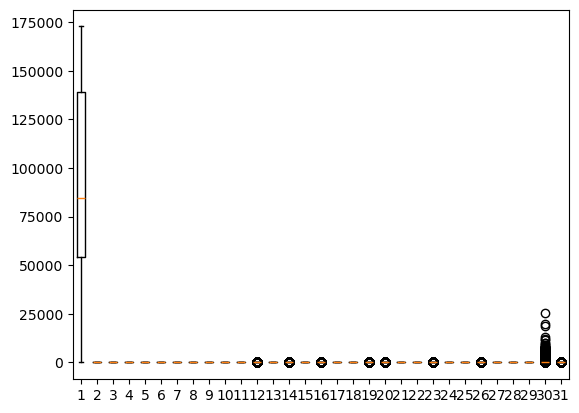

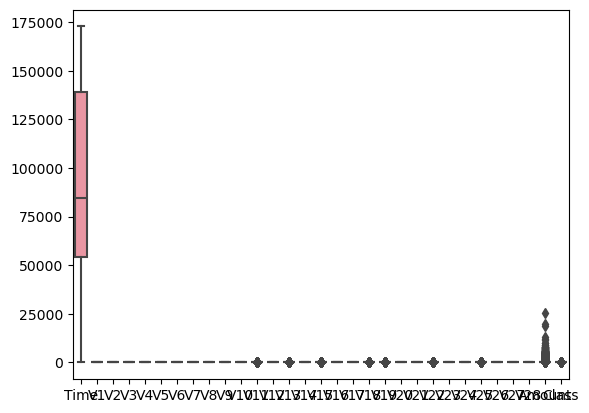

-----------------------------------------------------------------------


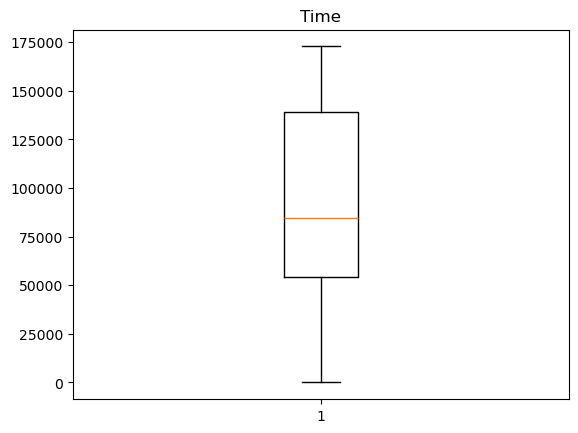

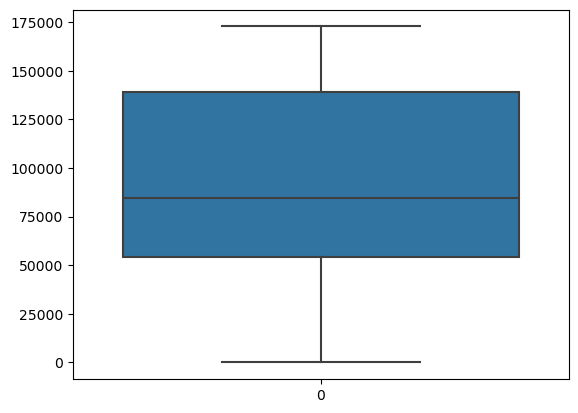

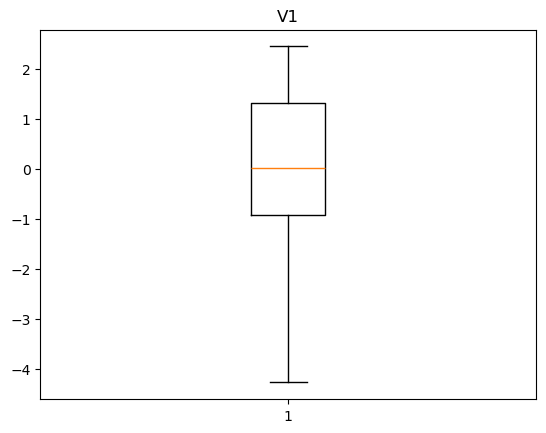

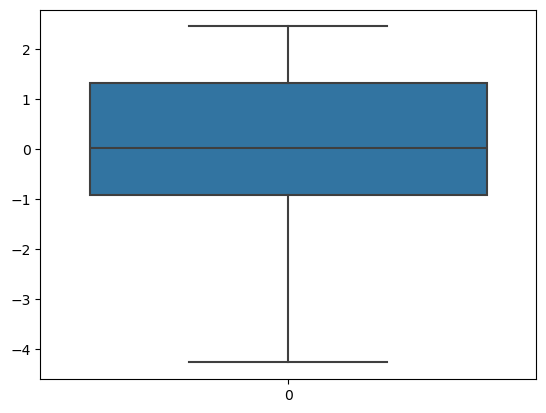

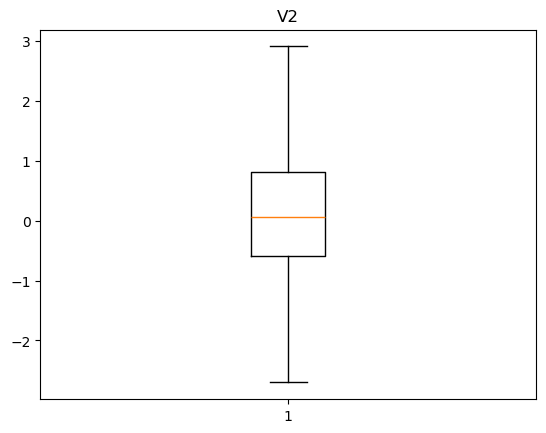

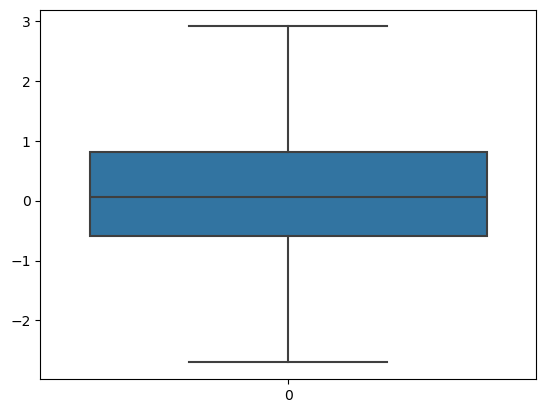

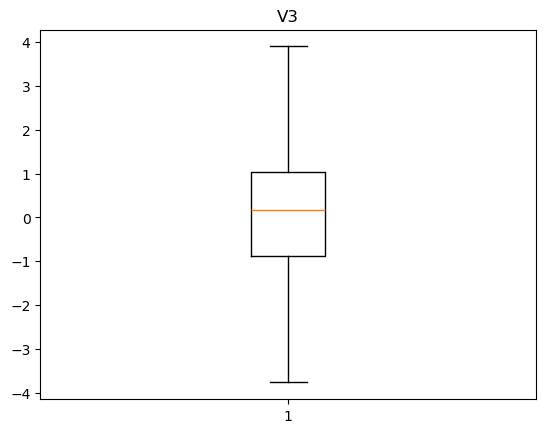

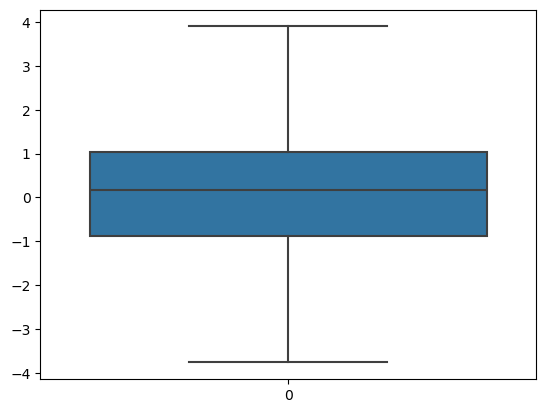

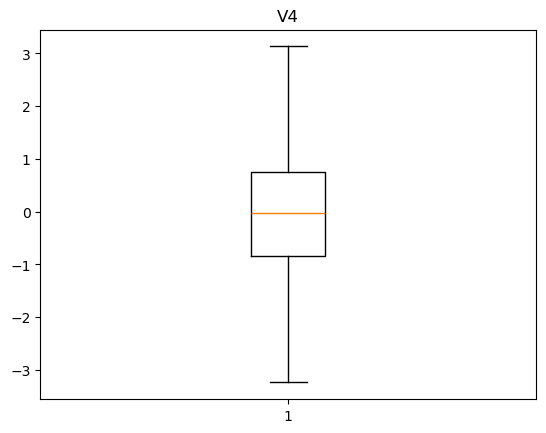

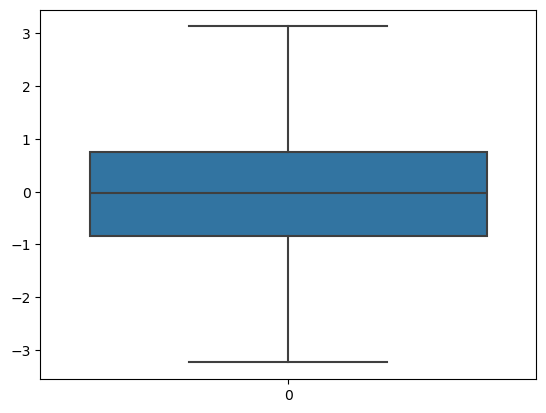

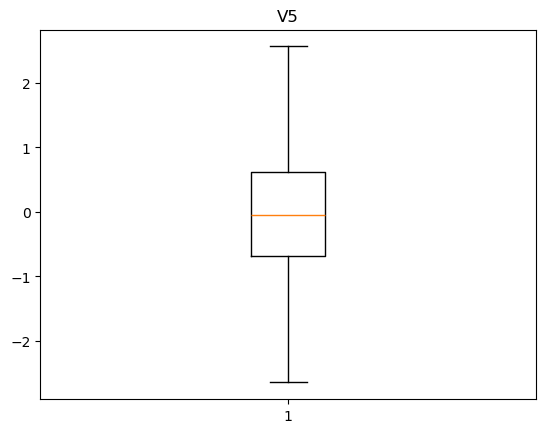

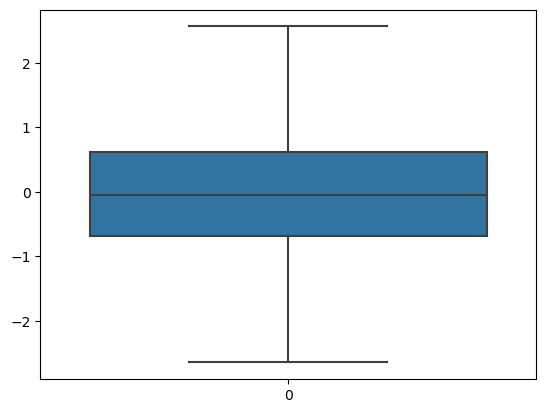

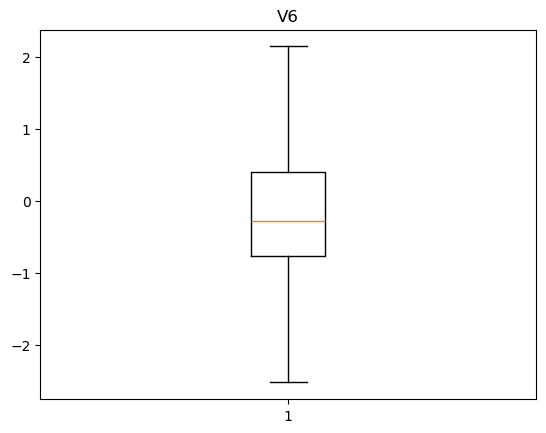

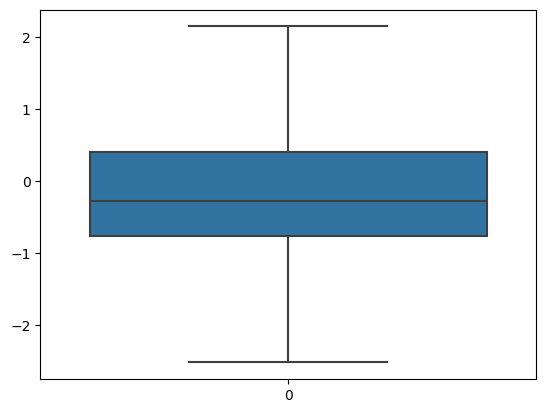

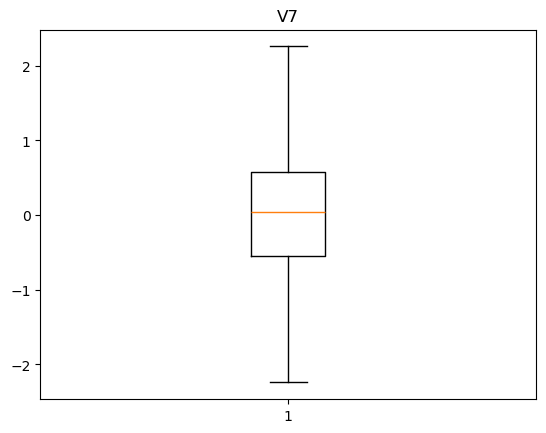

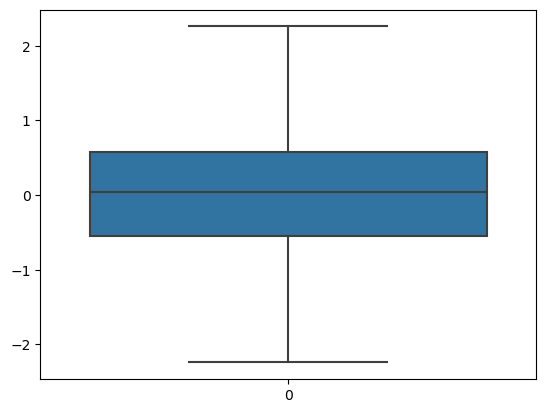

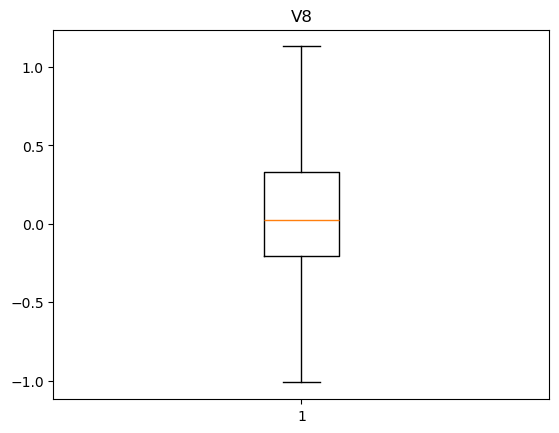

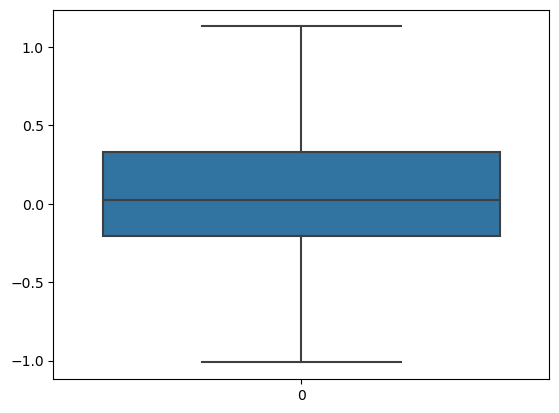

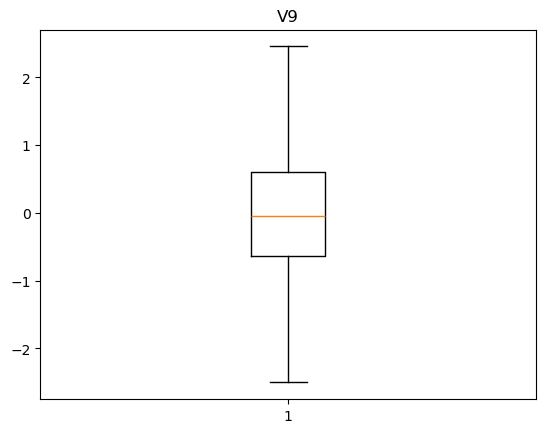

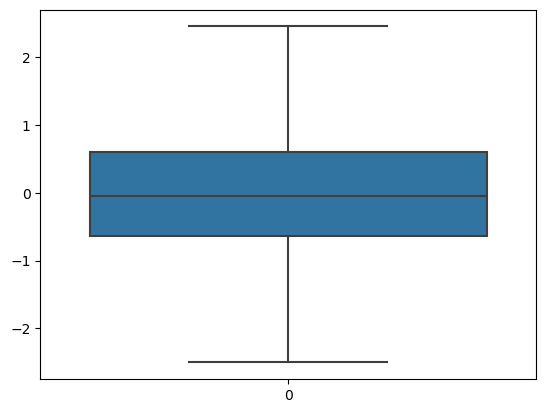

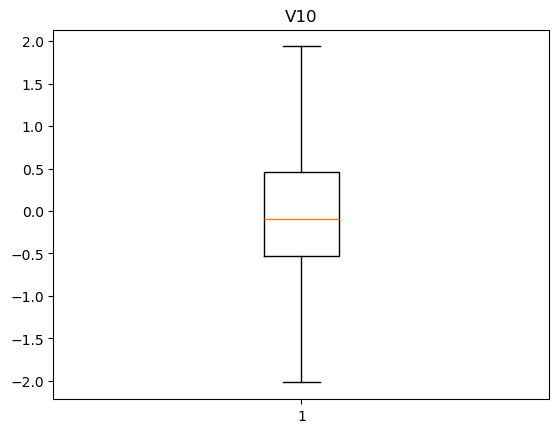

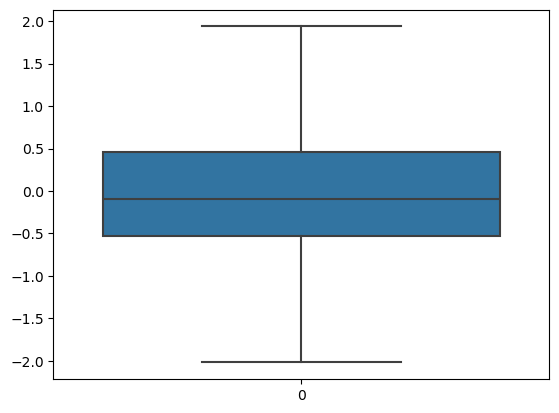

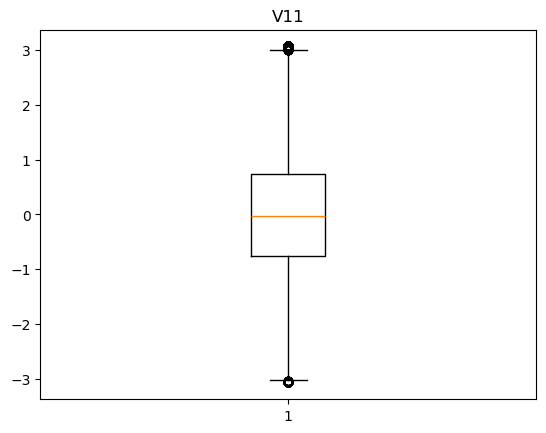

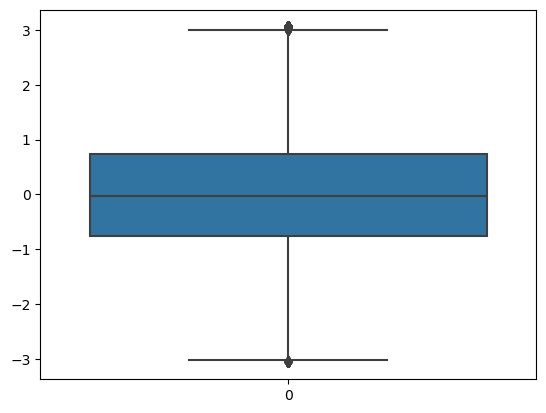

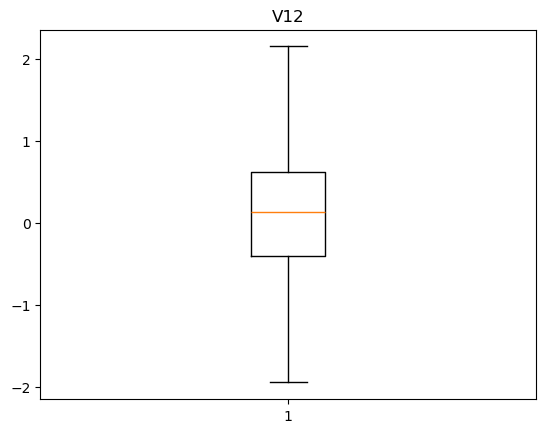

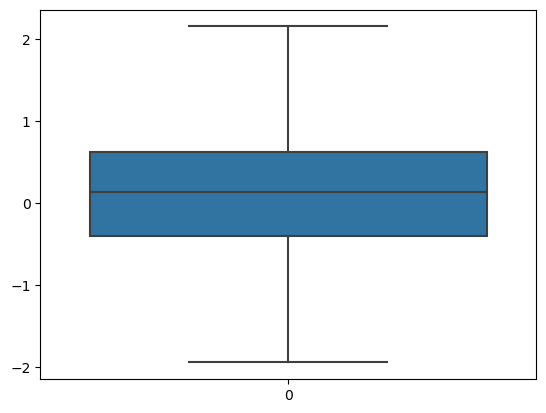

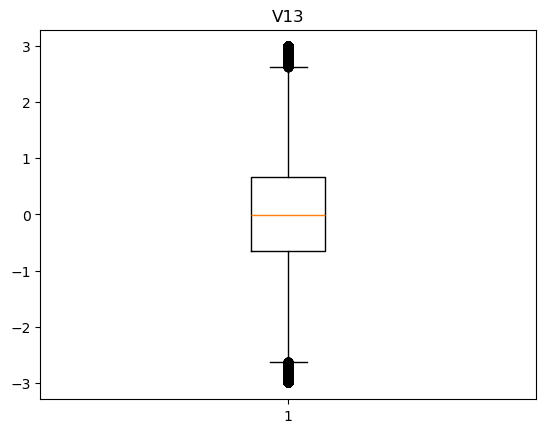

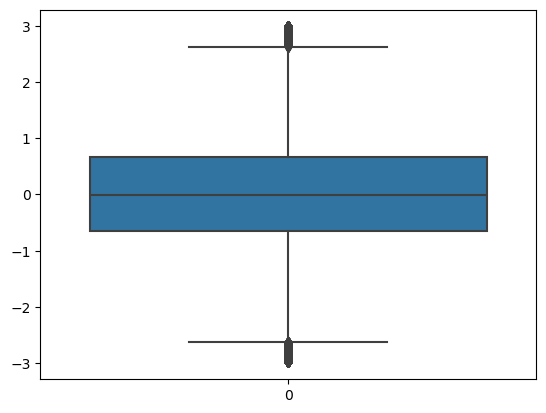

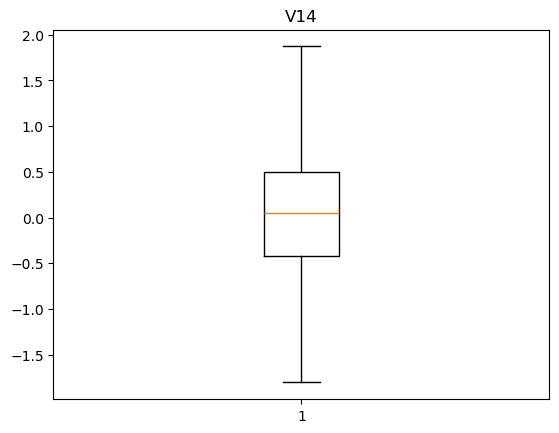

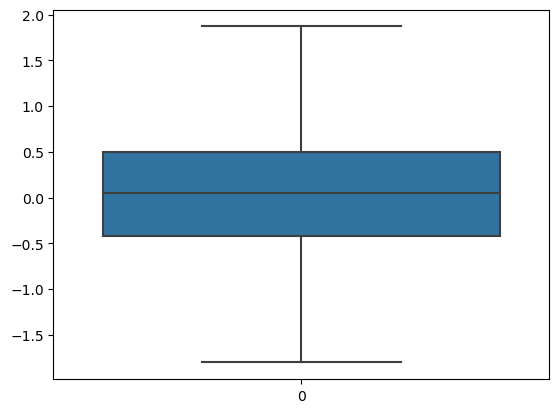

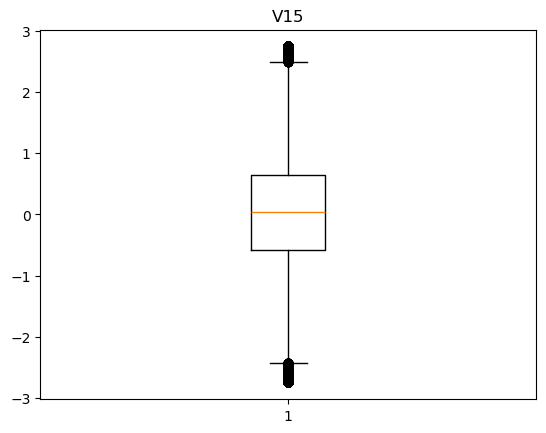

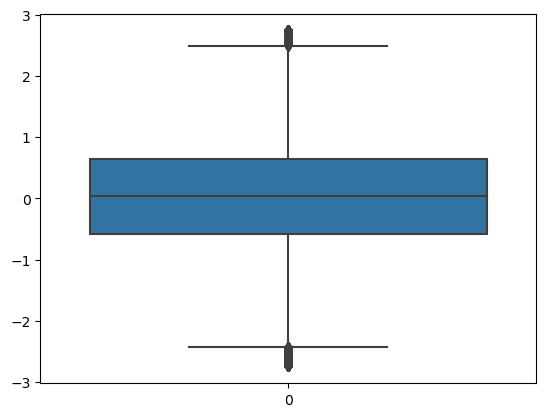

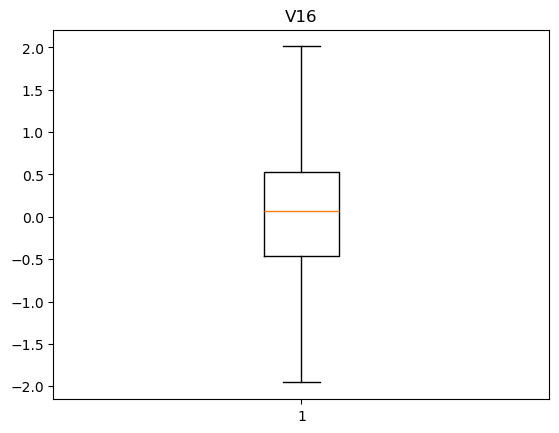

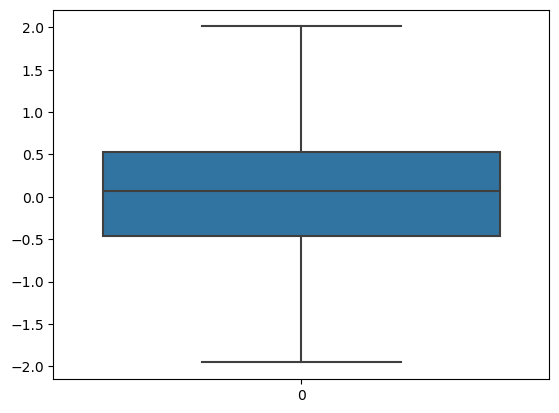

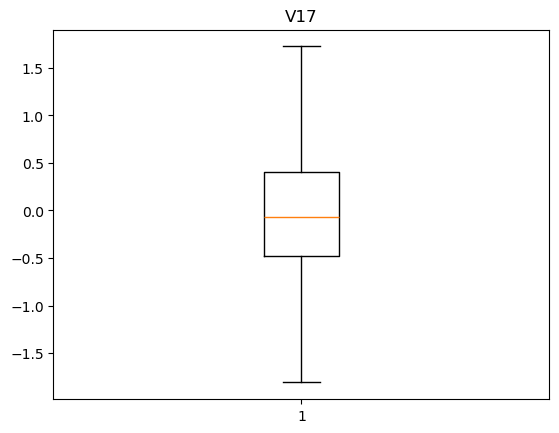

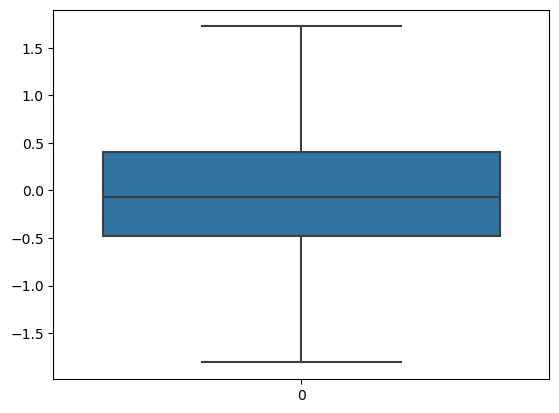

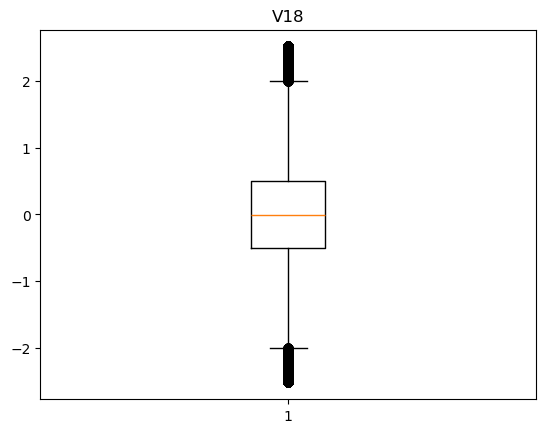

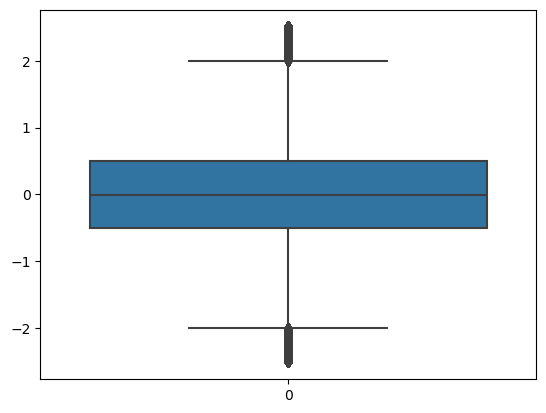

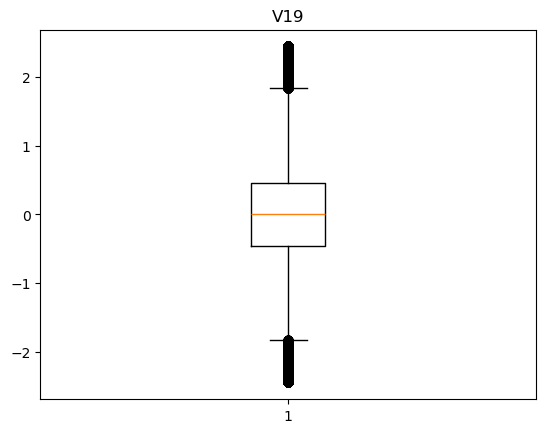

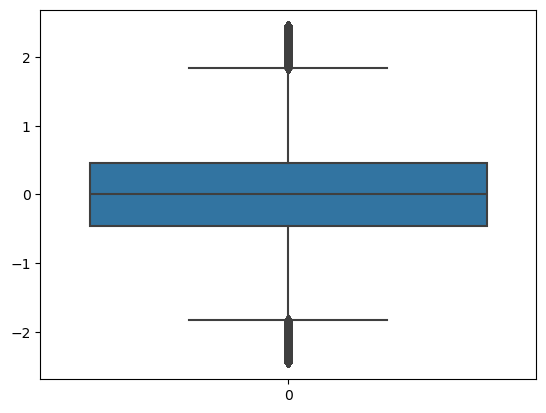

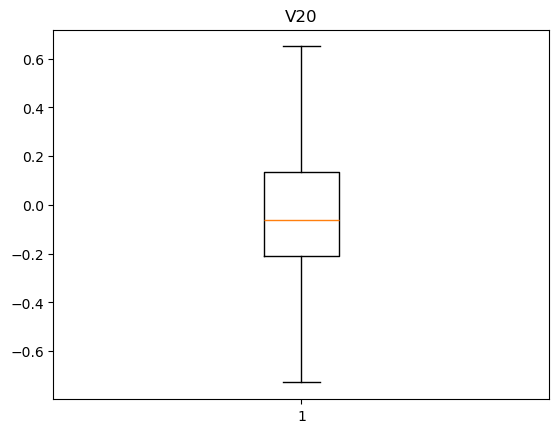

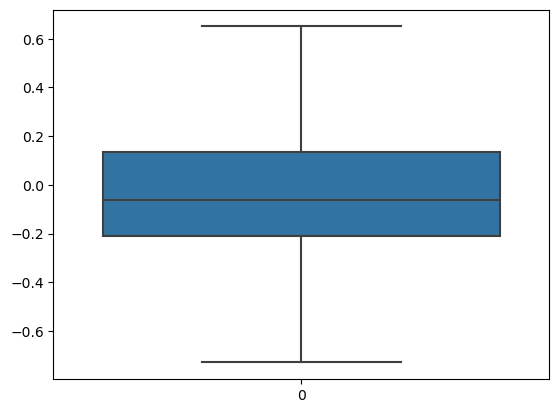

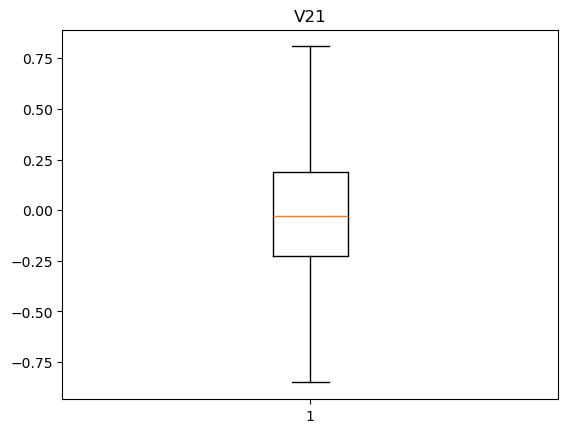

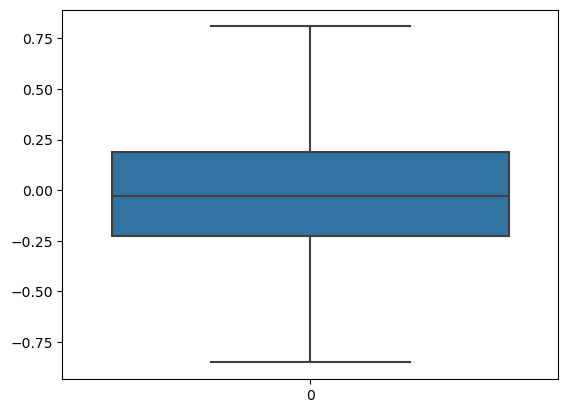

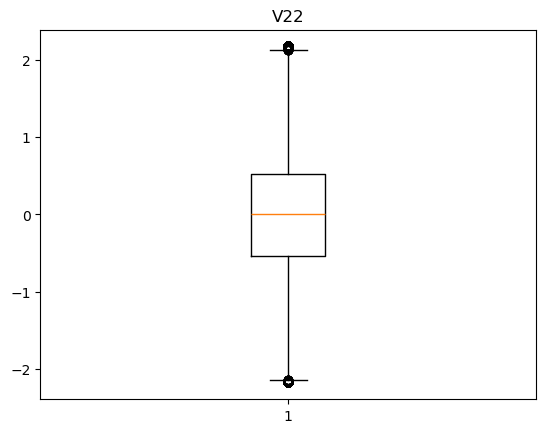

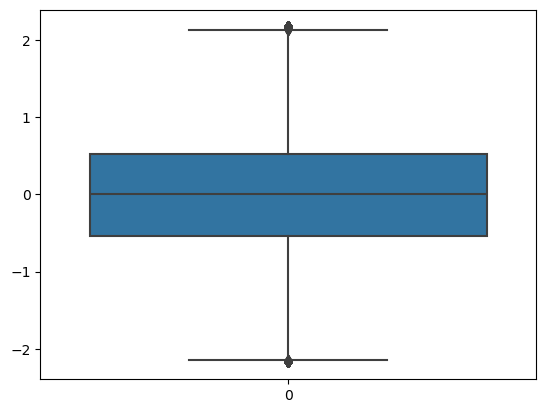

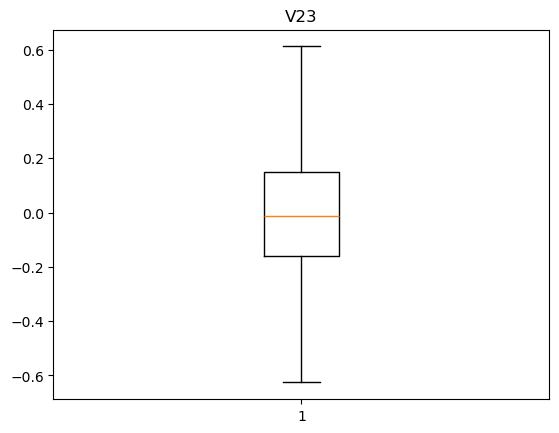

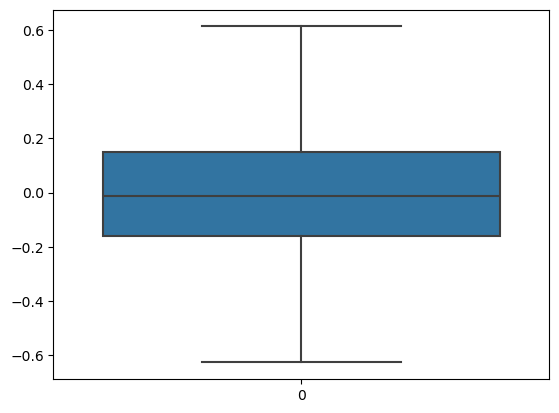

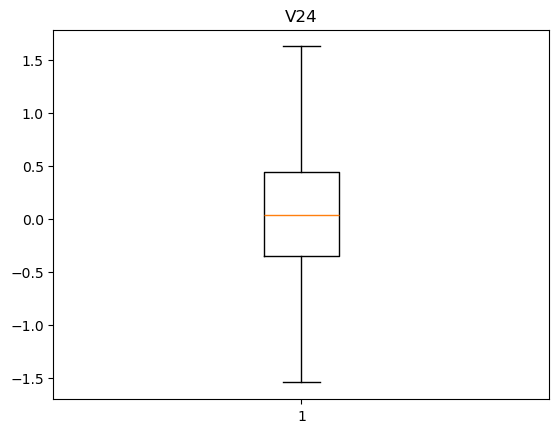

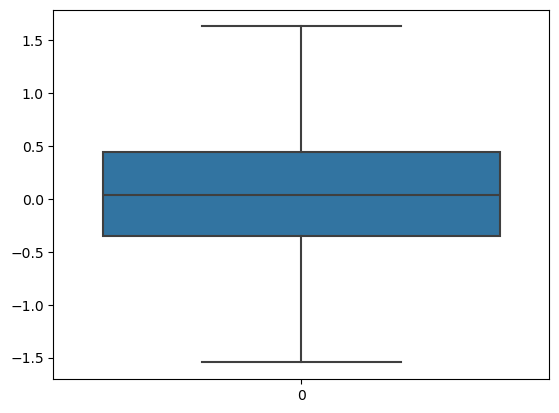

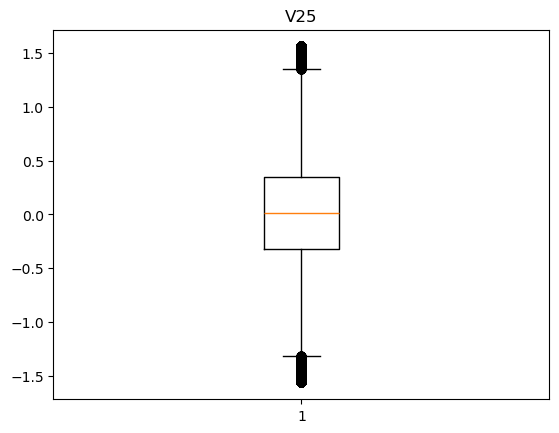

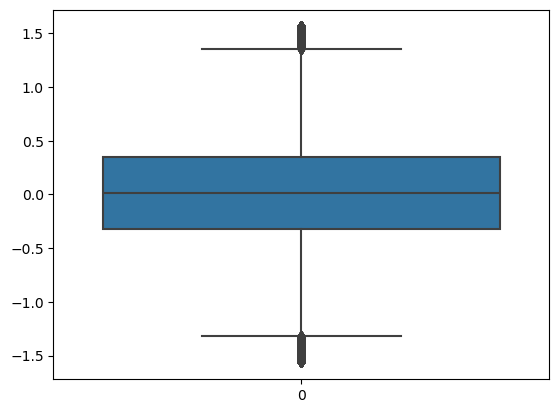

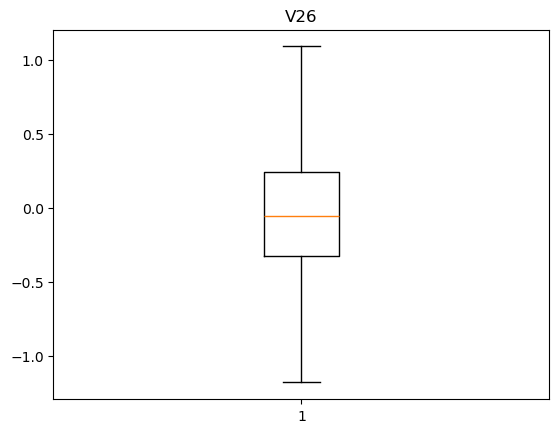

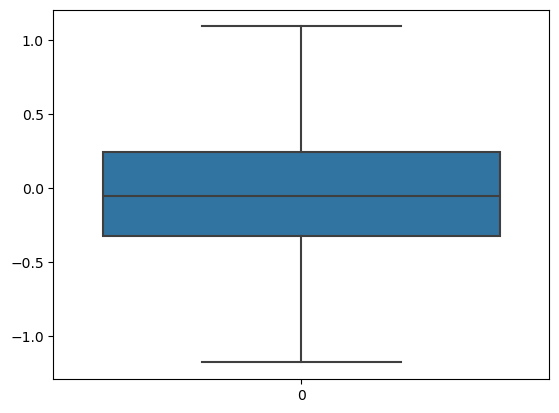

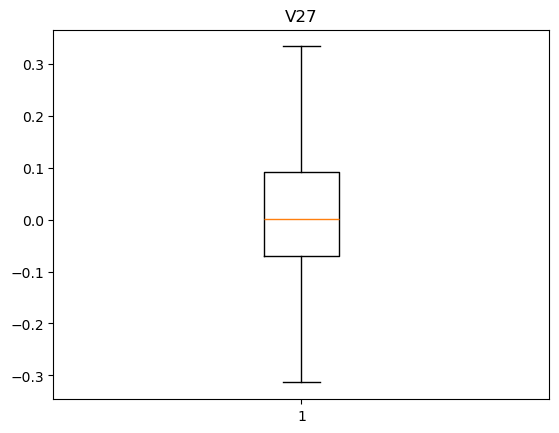

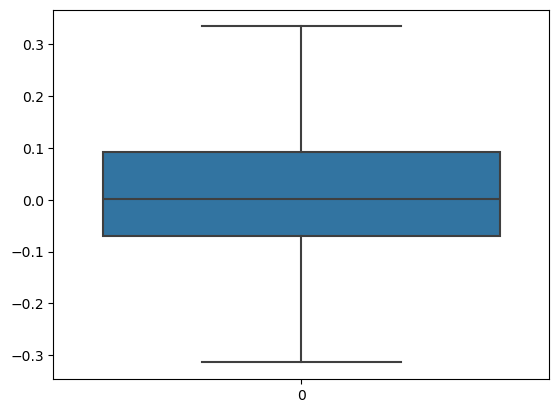

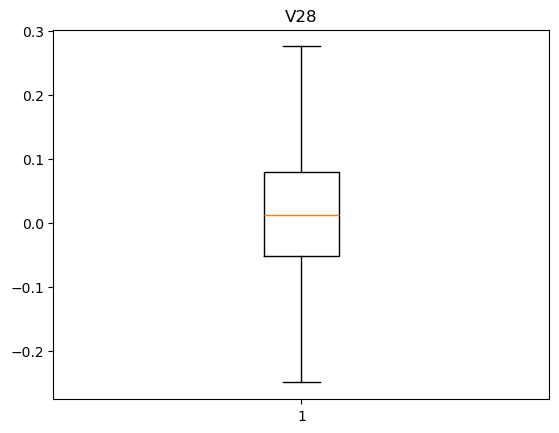

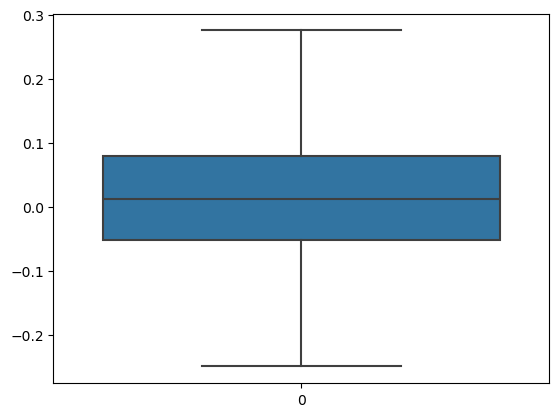

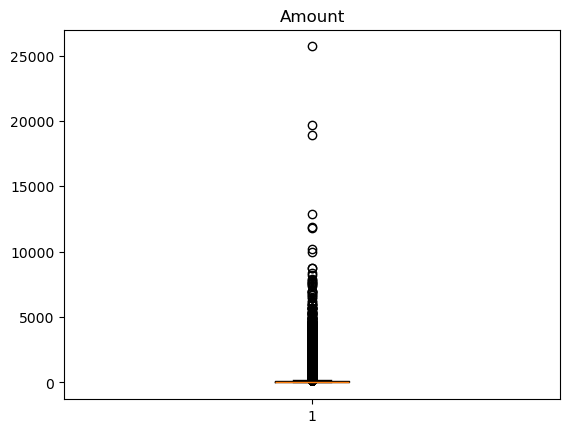

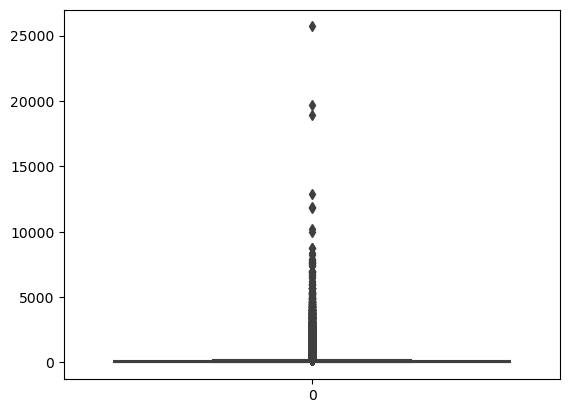

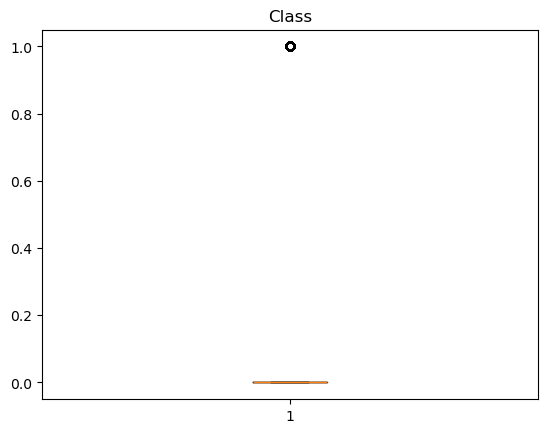

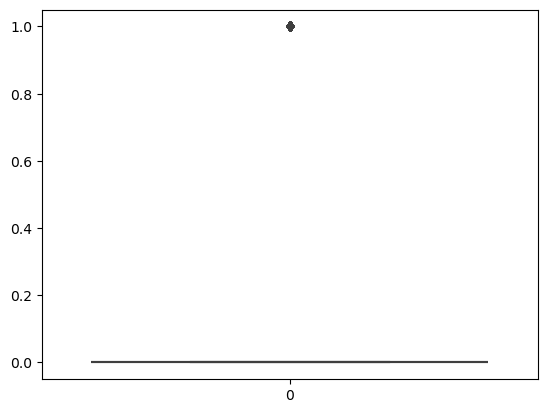

In [8]:
# Recheacking of errors
plt.boxplot(df)
plt.show()
sns.boxplot(df)
plt.show()

print("-----------------------------------------------------------------------")

# Showing errors are not removing in chart but actualy they are removed
for i in df.columns:
    plt.title(i)
    plt.boxplot(df[i])
    plt.show()
    sns.boxplot(df[i])
    plt.show()



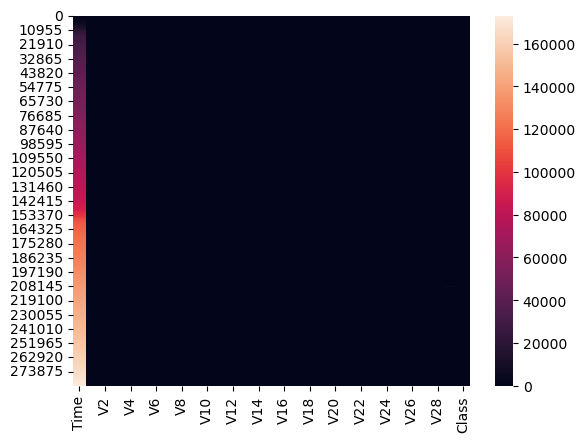

In [9]:
# checking the Correlation betwwen them
sns.heatmap(df)
plt.show()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.611875,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-4.274396,2.907135,-3.766705,-2.066656,-2.646882,-2.518586,-2.240844,1.131309,1.914428,...,0.650184,0.213454,0.111864,0.611875,-0.509348,1.436807,0.250034,0.333872,0.275140,0.77
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.567212,2.148856,-0.296827,0.708417,0.432454,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00


0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 284807, dtype: int64

(284807, 30) (284807,)


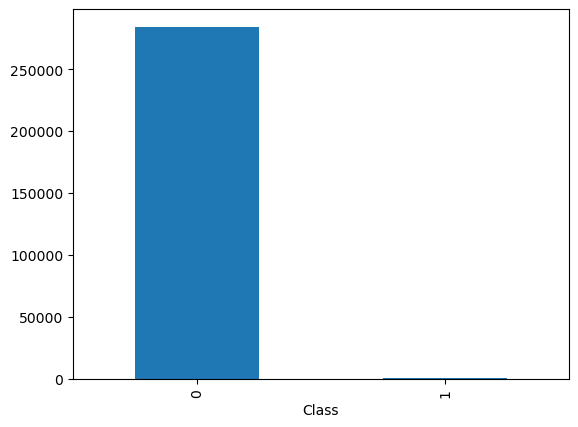

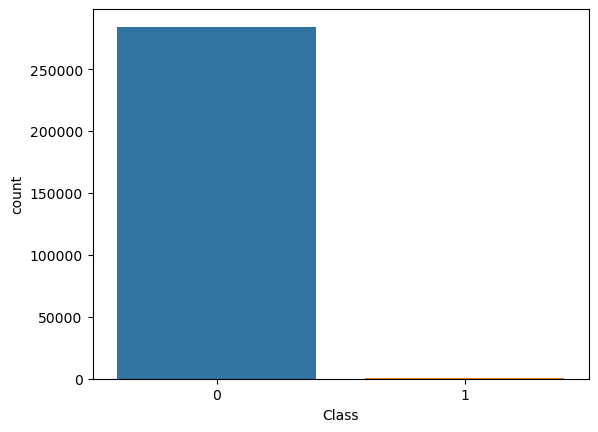

(568630, 30) (568630,)


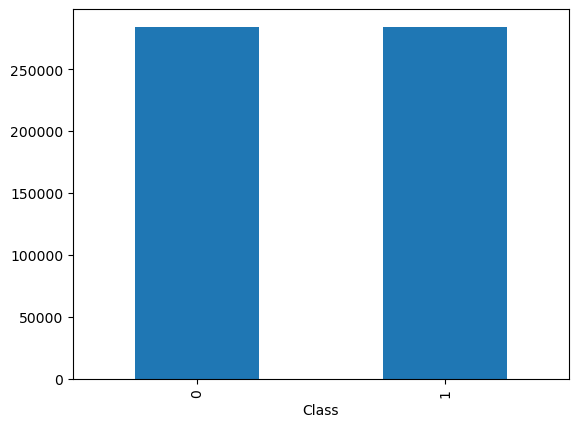

(454904, 30) (113726, 30) (454904,) (113726,)


In [ ]:
# spliting the data on the basis of independent columns(X) or dependent columns(y)
X=df.drop("Class",axis=1)
y=df['Class']
display(X,y)
print(X.shape,y.shape)

# checking imbalanceing on the dependent columns by using the bar plot
y.value_counts().plot(kind='bar')
plt.show()
sns.countplot(x='Class',data=df)
plt.show()

# there is imbalancing then   #  from imblearn.over_sampling import SMOTE
sm=SMOTE()
Xsm,ysm=sm.fit_resample(X,y)
print(Xsm.shape,ysm.shape)
ysm.value_counts().plot(kind='bar')
plt.show()


# train the model after doing the balancing of dependent column
X_train,X_test,y_train,y_test=train_test_split(Xsm,ysm,test_size=0.20)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

# import the model select the max score model
model=[dt,rdc,ada,gbc,knn,lr,sv]

sc=[]
for i in model:
    i.fit(X_train,y_train)
    s=i.score(X_test,y_test)
    sc.append(s)

m=max(sc)
print("The maximum score of  ",model[sc.index(m)]," == ",m)

In [15]:
model=[dt,rdc]

sc=[]
for i in model:
    
    dt.fit(X_train,y_train)
    dt.score(X_test,y_test)
    sc.append(s)

m=max(sc)
print("The maximum score  ",model[sc.index(m)]," == ",m)

The maximum score   DecisionTreeClassifier()  ==  0.9985139721787454
